> ## Exploratory Data Analysis of the Used Car Auction Prices dataset
>> ### MDDB Group A - Team 1 - AI Methods for Business
>
>> ### Nadia Aflatounian
>> ### Max Heijmans
>> ### Carl Hümbs
>> ### Can Senturk

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Importing the necessary libraries and reading the dataset</h1>
</div>

In [658]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
import numpy as np

In [659]:
# Impporting csv file
car_df = pd.read_csv(r"car_prices.csv", delimiter=',', on_bad_lines='skip') # Skipping 17 out of 558812, because of faulty data
df_original_len = len(car_df)
print('Original length of dataframe:', df_original_len)
print("There are {} rows and {} columns in the dataset".format(car_df.shape[0], car_df.shape[1]))

Original length of dataframe: 558811
There are 558811 rows and 16 columns in the dataset


In [660]:
car_df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca        4.5    1331.0   gray    black   
3  yv1612tb4f1310987    ca        4.1   14282.0  white    black   
4  wba6b2c57ed129731    ca        4.3    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   
3                 volvo na rep/world omni  27500         27750   
4  financial services remarketing (lease)  66000         67000   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [661]:
car_df.tail()

year    make   model         trim       body transmission  \
558806  2015     Kia    K900       Luxury      Sedan          NaN   
558807  2012     Ram    2500  Power Wagon   Crew Cab    automatic   
558808  2012     BMW      X5    xDrive35d        SUV    automatic   
558809  2015  Nissan  Altima        2.5 S      sedan    automatic   
558810  2014    Ford   F-150          XLT  SuperCrew    automatic   

                      vin state  condition  odometer   color interior  \
558806  knalw4d4xf6019304    in        4.5   18255.0  silver    black   
558807  3c6td5et6cg112407    wa        5.0   54393.0   white    black   
558808  5uxzw0c58cl668465    ca        4.8   50561.0   black    black   
558809  1n4al3ap0fc216050    ga        3.8   16658.0   white    black   
558810  1ftfw1et2eke87277    ca        3.4   15008.0    gray     gray   

                                                   seller    mmr  \
558806                                   avis corporation  35300   
558807                                    i -5 uhlmann rv  30200   
558808             financial services remarketing (lease)  29800   
558809  enterprise vehicle exchange / tra / rental / t...  15100   
558810                   ford motor credit company,llc pd  29600   

        sellingprice                                 saledate  
558806         33000  Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)  
558807         30800  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558808         34000  Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)  
558809         11100  Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)  
558810         26700  Thu May 28 2015 05:30:00 GMT-0700 (PDT)

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 2</span>
    <h1 style="font-size: 30px;">Cleaning the dataset</h1>
</div>

In [662]:
#renaming 'make' to 'brand' for easier understanding
car_df.rename(columns={'make': 'brand'}, inplace=True)

In [663]:
#Accessing column names
car_df.columns.values

array(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller',
       'mmr', 'sellingprice', 'saledate'], dtype=object)

In [664]:
#Getting dataframe information
car_df.info()

# Calculate the percentage of missing values for each column
missing_percentage = car_df.isnull().mean() * 100

# Display the missing percentages
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   brand         548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB
year             0.000000
brand  

In [665]:
# Select columns with object or category data type
categorical_columns = car_df.select_dtypes(include=['object']).columns

# Describe only the categorical columns
car_df[categorical_columns].describe()


brand   model    trim    body transmission                vin  \
count   548510  548412  548160  545616       493458             558811   
unique      96     973    1975      86            2             550296   
top       Ford  Altima    Base   Sedan    automatic  wbanv13588cz57827   
freq     93554   19349   55817  199437       475914                  5   

         state   color interior              seller  \
count   558811  558062   558062              558811   
unique      38      20       17               14264   
top         fl   black    black  nissan-infiniti lt   
freq     82945  110970   244325               19693   

                                       saledate  
count                                    558811  
unique                                     3745  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334

In [666]:
#Generating descriptive statistics upfront
car_df.describe()

year      condition       odometer            mmr  \
count  558811.000000  547017.000000  558717.000000  558811.000000   
mean     2010.038696       3.424512   68323.195797   13769.324646   
std         3.966812       0.949439   53397.752933    9679.874607   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000       2.700000   28374.000000    7100.000000   
50%      2012.000000       3.600000   52256.000000   12250.000000   
75%      2013.000000       4.200000   99112.000000   18300.000000   
max      2015.000000       5.000000  999999.000000  182000.000000   

        sellingprice  
count  558811.000000  
mean    13611.262461  
std      9749.656919  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000

In [667]:
#Getting all columns with numerical data
numerical_col = car_df.select_dtypes(['int64', 'float64']).columns
print("The numerical columns are:")
print(numerical_col)

The numerical columns are:
Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')


In [668]:
#Getting all columns with categorical data
cat_col = car_df.select_dtypes([object]).columns
print("The categorical columns are:")
print(cat_col)

The categorical columns are:
Index(['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')


In [669]:
car_df[cat_col].describe()

brand   model    trim    body transmission                vin  \
count   548510  548412  548160  545616       493458             558811   
unique      96     973    1975      86            2             550296   
top       Ford  Altima    Base   Sedan    automatic  wbanv13588cz57827   
freq     93554   19349   55817  199437       475914                  5   

         state   color interior              seller  \
count   558811  558062   558062              558811   
unique      38      20       17               14264   
top         fl   black    black  nissan-infiniti lt   
freq     82945  110970   244325               19693   

                                       saledate  
count                                    558811  
unique                                     3745  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334

Observations on Categoricals:

- The transmission column is predominantly populated by vehicles with automatic transmission (more than 50%).
- The vin, seller, saledate columns have high cardinality (a high number of unique values).
- The color and interior columns are dominated by vehicles with black exterior and interior colours (more than 20%).
- The brand column is predominantly populated by Ford vehicles (more than 15%).

In [670]:
car_df[numerical_col].describe()

year      condition       odometer            mmr  \
count  558811.000000  547017.000000  558717.000000  558811.000000   
mean     2010.038696       3.424512   68323.195797   13769.324646   
std         3.966812       0.949439   53397.752933    9679.874607   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000       2.700000   28374.000000    7100.000000   
50%      2012.000000       3.600000   52256.000000   12250.000000   
75%      2013.000000       4.200000   99112.000000   18300.000000   
max      2015.000000       5.000000  999999.000000  182000.000000   

        sellingprice  
count  558811.000000  
mean    13611.262461  
std      9749.656919  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000

Observations on Numericals:

- The columns year, condition, odometer have no issues with their min/max values.
- All column values still fall within reasonable ranges.
- There are differences between the mean and median in the columns year, condition, odometer, mmr, selling price, suggesting potential variations.
- Further review is necessary for the mmr column in preprocessing as the minimum value range is considerably distant from the mean and median.
- An anomaly exists in the minimum selling price, suspected to be unknown data, thus imputed with a value of 1 or vehicles sold as part of a corporate program (gifts).

Counting values

In [671]:
for col in cat_col:
    print(f'''Value count columns {col}:''')
    print(car_df[col].value_counts())
    print()

Value count columns brand:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: brand, Length: 96, dtype: int64

Value count columns model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count columns trim:
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: trim, Length: 1975, dtype: int64

Value count columns body:
Sedan          199437
SUV            1

wbanv13588cz57827    5
1ftfw1cv5afb30053    4
wp0ca2988xu629622    4
5n1ar1nn2bc632869    4
wddgf56x78f009940    4
                    ..
1p3ew65g7yv603989    1
4t1bf28b1yu016829    1
jtdbt1231y0082703    1
jtddr32t8y0063746    1
1ftfw1et2eke87277    1
Name: vin, Length: 550296, dtype: int64

Value count columns state:
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: state, dtype: int64

Value count columns color:
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold     

In [672]:
# Iterate through each column and display the count of unique values
for column in car_df.columns:
    unique_count = car_df[column].nunique()
    print(f"Count of unique values in '{column}' column: {unique_count}")

Count of unique values in 'year' column: 34
Count of unique values in 'brand' column: 96
Count of unique values in 'model' column: 973
Count of unique values in 'trim' column: 1975
Count of unique values in 'body' column: 86
Count of unique values in 'transmission' column: 2


Count of unique values in 'vin' column: 550296
Count of unique values in 'state' column: 38
Count of unique values in 'condition' column: 41
Count of unique values in 'odometer' column: 172277
Count of unique values in 'color' column: 20
Count of unique values in 'interior' column: 17
Count of unique values in 'seller' column: 14264
Count of unique values in 'mmr' column: 1101
Count of unique values in 'sellingprice' column: 1887
Count of unique values in 'saledate' column: 3745


Descriptive Statistics Observations:

- The dataset comprises 558,811 rows and 16 columns.
- There are no issues found with the names and content of each column.
- Several columns still contain null/missing values: brand, model, trim, body, transmission, condition, odometer, color, interior.
- The largest count of missing values is in the transmission column, totaling 65,353 entries (11.7% of the data).
- It appears that there are no evident issues with the data types in each column (they are already appropriate).

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>vin</b></font></div>

In [673]:
#Find duplicate VINs
duplicate_vins = car_df[car_df.duplicated(subset='vin', keep=False)]

In [674]:
#Aggregate rows for duplicate VINs
if not duplicate_vins.empty:
    aggregated_data = duplicate_vins.groupby('vin').agg({
        'sellingprice': 'mean',  #Aggregate selling prices (you can choose other aggregate functions)
        'odometer': 'mean',      #Aggregate odometer readings
        #Add more columns to aggregate as needed
    }).reset_index()

    #Display the aggregated data for duplicate VINs
    print(aggregated_data)
else:
    print("No cars sold more than once.")

                    vin  sellingprice  odometer
0     19uua5663ya022038        1050.0  105425.5
1     19uua65596a059705        8350.0   89701.0
2     19uua66215a070166        7350.0  131726.0
3     19uua66228a015410       10350.0   91839.0
4     19uua66228a024043       12850.0   78782.5
...                 ...           ...       ...
8321  zamce39a370028781       25150.0   39039.5
8322  zamce39a460025306       15500.0   92555.5
8323  zamce39a470026893       23250.0   46107.5
8324  zamfe39a970030502       30250.0   27925.5
8325  zfbcfabh4ez025834       10850.0   11474.0

[8326 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Missing Values</b></font></div>

Handling missing Values:
- Imputing categorical values according to the most frequent likely category
- Imputing numerical values according to either mode, mean or mode
- The columns year, vin, state, seller, mmr, saledate, and sellingprice do not have any missing values, so there's no need for handling them.

In [675]:
#Checking for missing values
missing_values_count = car_df.isnull().sum()
missing_values_percentage = (missing_values_count / len(car_df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

missing_data_summary = missing_data_summary.sort_values(by='Missing Values Count', ascending=False)

print("Missing values in each column:")
print(missing_data_summary)

Missing values in each column:
              Missing Values Count  Missing Values Percentage
transmission                 65353                  11.695010
body                         13195                   2.361263
condition                    11794                   2.110553
trim                         10651                   1.906011
model                        10399                   1.860915
brand                        10301                   1.843378
color                          749                   0.134035
interior                       749                   0.134035
odometer                        94                   0.016821
year                             0                   0.000000
vin                              0                   0.000000
state                            0                   0.000000
seller                           0                   0.000000
mmr                              0                   0.000000
sellingprice                     0     

In [676]:
# Define the columns to impute
columns_to_impute = ['transmission', 'brand', 'model', 'body', 'trim']

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the selected columns
car_df[columns_to_impute] = imputer.fit_transform(car_df[columns_to_impute])


### 1.1 Imputing missing values for 'condition'

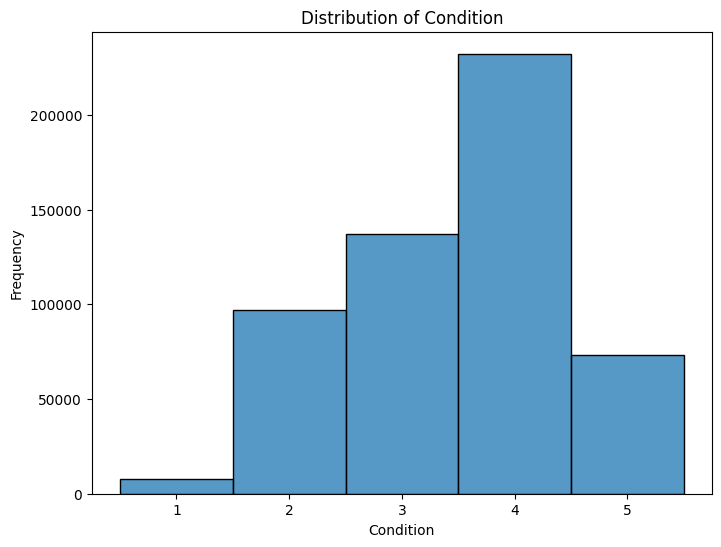

In [677]:
# Plotting the distribution of 'condition'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['condition'].dropna(), discrete=True)
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be normally distributed, we will use the Mean to imoute the missing values:

In [678]:
# Impute missing values in the 'condition' column with the mean
condition_mean = car_df['condition'].mean()
car_df['condition'].fillna(condition_mean, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['condition'].isnull().sum()
print("Missing values in 'condition' after imputation:", missing_values_after_imputation)

Missing values in 'condition' after imputation: 0


### 1.2 Imputing missing values for 'odometer'

Plotting the distribution of condition and odemeter, to see if we should use mean or meadian to impute the missing values.

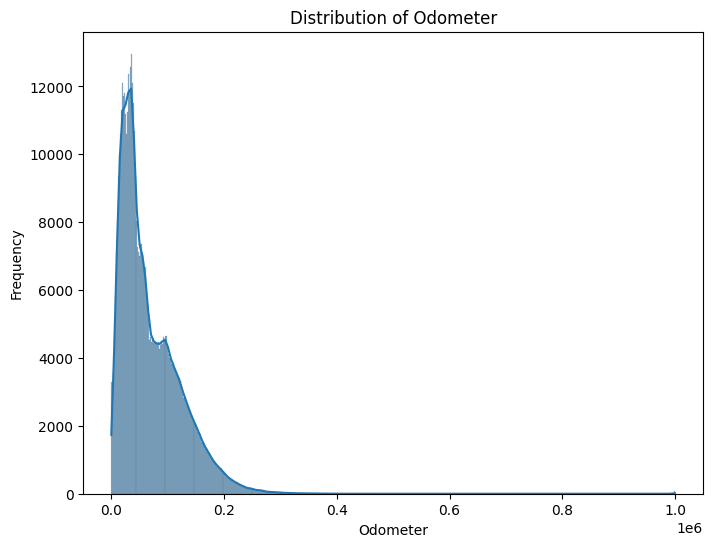

In [679]:
# Plotting the distribution of 'odometer'
plt.figure(figsize=(8, 6))
sns.histplot(car_df['odometer'].dropna(), kde=True)
plt.title('Distribution of Odometer')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()

As the data is numeric it appears to be skewed to the left, we will use the Median to imoute the missing values:

In [680]:
# Impute missing values in the 'odometer' column with the median
odometer_median = car_df['odometer'].median()
car_df['odometer'].fillna(odometer_median, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['odometer'].isnull().sum()
print("Missing values in 'odometer' after imputation:", missing_values_after_imputation)

Missing values in 'odometer' after imputation: 0


### 1.3 Imputing missing values for 'color'

In [681]:
print("Data type of 'interior' column:", car_df['color'].dtype)

Data type of 'interior' column: object


As 'color' is a categorical variable, we use Mode to impute missing values:

In [682]:
# Calculate the mode of the 'color' column
color_mode = car_df['color'].mode()[0]

# Fill missing values in the 'color' column with the mode
car_df['color'].fillna(color_mode, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['color'].isnull().sum()
print("Missing values in 'color' after imputation:", missing_values_after_imputation)

Missing values in 'color' after imputation: 0


### 1.3 Imputing missing values for 'interior'

In [683]:
print("Data type of 'interior' column:", car_df['interior'].dtype)

Data type of 'interior' column: object


As 'interior' is a categorical variable, we use Mode to impute missing values:

In [684]:
# Calculate the mode of the 'interior' column
interior_mode = car_df['interior'].mode()[0]

# Fill missing values in the 'interior' column with the mode
car_df['interior'].fillna(interior_mode, inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = car_df['interior'].isnull().sum()
print("Missing values in 'interior' after imputation:", missing_values_after_imputation)

Missing values in 'interior' after imputation: 0


### Finally: checking if there are still empty values left:

In [685]:
#Checking for null values again to check the previous code
car_df.isna().sum().sort_values(ascending=False)

year            0
brand           0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Mapping and capitalising columns</b></font></div>

We've observed inconsistencies in the way brand names are written—some are in abbreviations or lack proper capitalisation. By mapping these brand names, we aim to unify them for consistency and ensure they are uniformly represented.

In [686]:
mapping_dict = {
    'brand': {'vw': 'Volkswagen', 'ford tk': 'Ford', 'ford truck': 'Ford', 'chev truck': 'Chevrolet',
              'dodge tk': 'Dodge', 'hyundai tk': 'Hyundai', 'bmw': 'BMW', 'mercedes-b': 'Mercedes-Benz',
              'mercedes': 'Mercedes-Benz', 'gmc': 'GMC', 'gmc truck': 'GMC', 'mazda tk': 'Mazda', 
              'landrover': 'Land Rover'},
    'body': {'Suv': 'SUV', 'Supercrew': 'SuperCrew', 'Regular-Cab': 'Regular Cab'}
}

#Apply mapping to the specified columns in the 'car_df' DataFrame
for column, mapping in mapping_dict.items():
    car_df[column] = car_df[column].replace(mapping)

#Example usage:
car_df['brand'] = car_df['brand'].replace(mapping_dict['brand'])
car_df['body'] = car_df['body'].replace(mapping_dict['body'])


In [687]:
#Function for capitalising
def capitalise(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: ' '.join(word.capitalize() for word in x.split()))
    return df

In [688]:
# List of columns to capitalise
columns_to_capitalise = ['brand', 'model', 'trim', 'body', 'transmission', 'color', 'seller']

# Apply capitalisation to the specified columns in the 'car_df' DataFrame
car_df = capitalise(car_df, columns_to_capitalise)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Duplicates</b></font></div>

In [689]:
#Checking duplicates
duplicates = car_df.duplicated().sum()
if duplicates == 0:
    print("There are " + str(duplicates) + " in the dataset")
else:
    print("There are" + str(duplicates) + "in the dataset")
# print("Duplicate values: " + str(duplicates))

There are 0 in the dataset


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>new_saledate_format</b></font></div>

In [690]:
from datetime import datetime

# Clean 'saledate' column and convert to datetime
car_df['saledate'] = pd.to_datetime(car_df['saledate'].str.replace(r' GMT[-+]\d{4} \(\w{3}\)', '', regex=True).str.strip(), errors='coerce')

# Create 'new_saledate_format' column with desired format
car_df['new_saledate_format'] = car_df['saledate'].dt.strftime('%b %Y')

# Extract date part and calculate time span
car_df['date_part'] = pd.to_datetime(car_df['saledate'].dt.strftime('%Y-%m-%d'), errors='coerce')
min_date = car_df['date_part'].min()
max_date = car_df['date_part'].max()

# Display date information
print(car_df[['saledate', 'new_saledate_format']])
print(car_df[['saledate', 'date_part']])
print(f"Min Date: {min_date}\nMax Date: {max_date}\nTime Span: {max_date - min_date}")

                  saledate new_saledate_format
0      2014-12-16 12:30:00            Dec 2014
1      2014-12-16 12:30:00            Dec 2014
2      2015-01-15 04:30:00            Jan 2015
3      2015-01-29 04:30:00            Jan 2015
4      2014-12-18 12:30:00            Dec 2014
...                    ...                 ...
558806 2015-07-09 07:00:00            Jul 2015
558807 2015-07-08 09:30:00            Jul 2015
558808 2015-07-08 09:30:00            Jul 2015
558809 2015-07-09 06:45:00            Jul 2015
558810 2015-05-28 05:30:00            May 2015

[558811 rows x 2 columns]
                  saledate  date_part
0      2014-12-16 12:30:00 2014-12-16
1      2014-12-16 12:30:00 2014-12-16
2      2015-01-15 04:30:00 2015-01-15
3      2015-01-29 04:30:00 2015-01-29
4      2014-12-18 12:30:00 2014-12-18
...                    ...        ...
558806 2015-07-09 07:00:00 2015-07-09
558807 2015-07-08 09:30:00 2015-07-08
558808 2015-07-08 09:30:00 2015-07-08
558809 2015-07-09 06:45:00 20

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>care_age</b></font></div>

In [691]:
# Extract the year of sale from 'saledate' and convert to datetime if not already in datetime format
car_df['saledate'] = pd.to_datetime(car_df['saledate'], errors='coerce')
car_df['year_of_sale'] = car_df['saledate'].dt.year

# Assuming the column 'manufacture_year' represents the year of manufacture
# Calculate 'car_age' by subtracting the manufacture year from the year of sale
car_df['car_age'] = car_df['year_of_sale'] - car_df['year']

# Display the DataFrame with the newly added 'car_age' column
print(car_df[['saledate', 'year', 'year_of_sale', 'car_age']])

                  saledate  year  year_of_sale  car_age
0      2014-12-16 12:30:00  2015          2014       -1
1      2014-12-16 12:30:00  2015          2014       -1
2      2015-01-15 04:30:00  2014          2015        1
3      2015-01-29 04:30:00  2015          2015        0
4      2014-12-18 12:30:00  2014          2014        0
...                    ...   ...           ...      ...
558806 2015-07-09 07:00:00  2015          2015        0
558807 2015-07-08 09:30:00  2012          2015        3
558808 2015-07-08 09:30:00  2012          2015        3
558809 2015-07-09 06:45:00  2015          2015        0
558810 2015-05-28 05:30:00  2014          2015        1

[558811 rows x 4 columns]


In [692]:
# Filter the DataFrame for rows where 'car_age' is less than 0 and count the occurrences
negative_car_age_count = (car_df['car_age'] < 0).sum()

# Display the count of rows where 'car_age' is less than 0
print(f"Number of rows where car_age is less than 0: {negative_car_age_count}")

Number of rows where car_age is less than 0: 201


In [693]:
# Filter the DataFrame to keep rows where 'car_age' is greater than or equal to 0
car_df = car_df[car_df['car_age'] >= 0]

In [694]:
# Count of rows in the DataFrame after dropping rows with negative 'car_age'
row_count = len(car_df)
print(f"New row count: {row_count}")

New row count: 558610


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>mileage_per_year</b></font></div>

In [695]:
import datetime

# Assuming 'year' represents the year of the car and 'odometer' represents the odometer reading
# Calculate current year for reference
current_year = datetime.datetime.now().year

# Calculate car age by subtracting 'year' from the current year
car_df['car_age'] = current_year - car_df['year']

# Calculate mileage per year by dividing odometer reading by car age
car_df['mileage_per_year'] = car_df['odometer'] / car_df['car_age']


In [696]:
car_df.head()

year      brand                model        trim   body transmission  \
2  2014        Bmw             3 Series  328i Sulev  Sedan    Automatic   
3  2015      Volvo                  S60          T5  Sedan    Automatic   
4  2014        Bmw  6 Series Gran Coupe        650i  Sedan    Automatic   
6  2014        Bmw                   M5        Base  Sedan    Automatic   
7  2014  Chevrolet                Cruze         1lt  Sedan    Automatic   

                 vin state  condition  odometer  ... interior  \
2  wba3c1c51ek116351    ca        4.5    1331.0  ...    black   
3  yv1612tb4f1310987    ca        4.1   14282.0  ...    black   
4  wba6b2c57ed129731    ca        4.3    2641.0  ...    black   
6  wbsfv9c51ed593089    ca        3.4   14943.0  ...    black   
7  1g1pc5sb2e7128460    ca        2.0   28617.0  ...    black   

                                              seller    mmr  sellingprice  \
2             Financial Services Remarketing (lease)  31900         30000   
3                            Volvo Na Rep/world Omni  27500         27750   
4             Financial Services Remarketing (lease)  66000         67000   
6                              The Hertz Corporation  69000         65000   
7  Enterprise Vehicle Exchange / Tra / Rental / T...  11900          9800   

             saledate new_saledate_format  date_part year_of_sale  car_age  \
2 2015-01-15 04:30:00            Jan 2015 2015-01-15         2015        9   
3 2015-01-29 04:30:00            Jan 2015 2015-01-29         2015        8   
4 2014-12-18 12:30:00            Dec 2014 2014-12-18         2014        9   
6 2014-12-17 12:30:00            Dec 2014 2014-12-17         2014        9   
7 2014-12-16 13:00:00            Dec 2014 2014-12-16         2014        9   

   mileage_per_year  
2        147.888889  
3       1785.250000  
4        293.444444  
6       1660.333333  
7       3179.666667  

[5 rows x 21 columns]

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>market_price_deviation</b></font></div>

In [697]:
# Calculate deviation by subtracting 'mmr' from 'sellingprice'
car_df['market_price_deviation'] = car_df['sellingprice'] - car_df['mmr']

# Display the DataFrame with the added 'market_price_deviation' column
print(car_df[['mmr', 'sellingprice', 'market_price_deviation']])

          mmr  sellingprice  market_price_deviation
2       31900         30000                   -1900
3       27500         27750                     250
4       66000         67000                    1000
6       69000         65000                   -4000
7       11900          9800                   -2100
...       ...           ...                     ...
558806  35300         33000                   -2300
558807  30200         30800                     600
558808  29800         34000                    4200
558809  15100         11100                   -4000
558810  29600         26700                   -2900

[558610 rows x 3 columns]


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Cleaning Colours</b></font></div>

In [698]:
def clean_colours(df):
    #Define a function to clean colours for both 'color' and 'interior' columns
    def clean_colour_data(col):
        #Define mapping for similar colours to be merged
        similar_colours = {
            'burgundy': 'red',
            'charcoal': 'black',  #Merging similar colours
            'off-white': 'white',  #Merging similar colours
            '—': 'Other',  #Replacing '—' with 'Other'
        }

        #Merge similar colours and categorise low-frequency colours
        col.replace(similar_colours, inplace=True)

    #Clean 'color' column
    clean_colour_data(df['color'])

    #Clean 'interior' column
    clean_colour_data(df['interior'])

In [699]:
# Display unique values in the 'color' column before cleaning and add whitespace
unique_colours_before_cleaning = car_df['color'].unique()
print(f"{unique_colours_before_cleaning}\n")

# Display count of each unique value in the 'color' column before cleaning
colour_counts_before_cleaning = car_df['color'].value_counts()
print(colour_counts_before_cleaning)

['Gray' 'White' 'Black' 'Red' 'Blue' 'Silver' 'Brown' 'Beige' '—' 'Gold'
 'Yellow' 'Green' 'Burgundy' 'Charcoal' 'Purple' 'Orange' 'Off-white'
 'Turquoise' 'Pink' 'Lime']

Black        111682
White        106625
Silver        83358
Gray          82817
Blue          51127
Red           43557
—             24680
Green         11382
Gold          11341
Beige          9217
Burgundy       8969
Brown          6714
Orange         2077
Purple         1559
Off-white      1448
Yellow         1285
Charcoal        479
Turquoise       236
Pink             42
Lime             15
Name: color, dtype: int64


In [700]:
#Display unique values in the 'color' column before cleaning
unique_interiors_before_cleaning = car_df['interior'].unique()
print(f"{unique_interiors_before_cleaning}\n")

#Display unique values in the 'color' column before cleaning
count_interiors_before_cleaning = car_df['interior'].value_counts()
print(count_interiors_before_cleaning)

['black' 'beige' 'brown' 'gray' '—' 'burgundy' 'tan' 'white' 'silver'
 'off-white' 'blue' 'red' 'yellow' 'green' 'purple' 'orange' 'gold']

black        244965
gray         178527
beige         59739
tan           44084
—             17067
brown          8638
red            1357
blue           1138
silver         1099
off-white       480
purple          339
gold            324
white           252
green           245
burgundy        191
orange          145
yellow           20
Name: interior, dtype: int64


In [701]:
#Applying the function to map colours in 'color' and 'interior' columns
clean_colours(car_df)

In [702]:
# Display unique colours after cleaning in the 'color' column
unique_colours_after_cleaning = car_df['color'].unique()
print("Unique colours after cleaning:")
print(unique_colours_after_cleaning)

# Display count of each unique colour after cleaning in the 'color' column
colour_counts_after_cleaning = car_df['color'].value_counts()
print("\nCount of each unique colour after cleaning:")
print(colour_counts_after_cleaning)

# Display unique interior colours after cleaning in the 'interior' column
unique_interiors_after_cleaning = car_df['interior'].unique()
print("\nUnique interior colours after cleaning:")
print(unique_interiors_after_cleaning)

# Display count of each unique interior colour after cleaning in the 'interior' column
count_interiors_after_cleaning = car_df['interior'].value_counts()
print("\nCount of each interior colour after cleaning:")
print(count_interiors_after_cleaning)

Unique colours after cleaning:
['Gray' 'White' 'Black' 'Red' 'Blue' 'Silver' 'Brown' 'Beige' 'Other'
 'Gold' 'Yellow' 'Green' 'Burgundy' 'Charcoal' 'Purple' 'Orange'
 'Off-white' 'Turquoise' 'Pink' 'Lime']

Count of each unique colour after cleaning:
Black        111682
White        106625
Silver        83358
Gray          82817
Blue          51127
Red           43557
Other         24680
Green         11382
Gold          11341
Beige          9217
Burgundy       8969
Brown          6714
Orange         2077
Purple         1559
Off-white      1448
Yellow         1285
Charcoal        479
Turquoise       236
Pink             42
Lime             15
Name: color, dtype: int64

Unique interior colours after cleaning:
['black' 'beige' 'brown' 'gray' 'Other' 'red' 'tan' 'white' 'silver'
 'blue' 'yellow' 'green' 'purple' 'orange' 'gold']

Count of each interior colour after cleaning:
black     244965
gray      178527
beige      59739
tan        44084
Other      17067
brown       8638
red         1

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>brand_model</b></font></div>

### X.1 Creating a new column that combines 'brand' and 'model'

In [703]:
# Create a new column 'Brand_Model_Combination' by concatenating 'brand' and 'model'
car_df['brand_model'] = car_df['brand'] + '_' + car_df['model']

# Display the new column
print(car_df['brand_model'])

2                    Bmw_3 Series
3                       Volvo_S60
4         Bmw_6 Series Gran Coupe
6                          Bmw_M5
7                 Chevrolet_Cruze
                   ...           
558806                   Kia_K900
558807                   Ram_2500
558808                     Bmw_X5
558809              Nissan_Altima
558810                 Ford_F-150
Name: brand_model, Length: 558610, dtype: object


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 3</span>
    <h1 style="font-size: 30px;">Univariate Analysis</h1>
</div>

In [704]:
#Refresh and update for numerical and categorical columns
numerical_col = car_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_col = car_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:")
print(numerical_col)

print("\nCategorical Columns:")
print(categorical_col)

Numerical Columns:
['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale', 'car_age', 'mileage_per_year', 'market_price_deviation']

Categorical Columns:
['brand', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'new_saledate_format', 'brand_model']


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Numerical Boxplots</b></font></div>

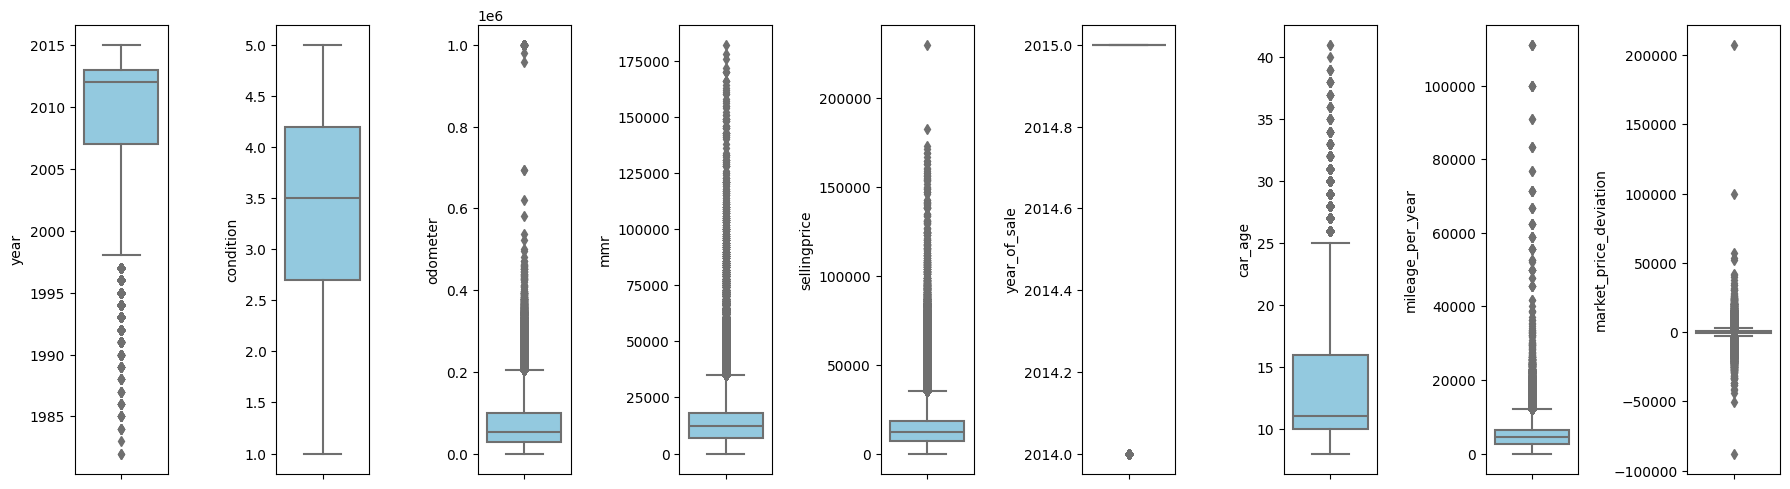

In [705]:
plt.figure(figsize=(18, 5))
num_features = numerical_col
for i in range(0, len(num_features)):
    plt.subplot(1, len(num_features), i + 1)
    sns.boxplot(y=car_df[num_features[i]], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

Boxplot observation:
- From the box plot, the main outliers are seen in the odometer and sellingprice columns,
- Columns that appear to have a fairly skewed distribution are also seen in year, odometer, mmr, sellingprice.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Distribution Plots for Numericals</b></font></div>

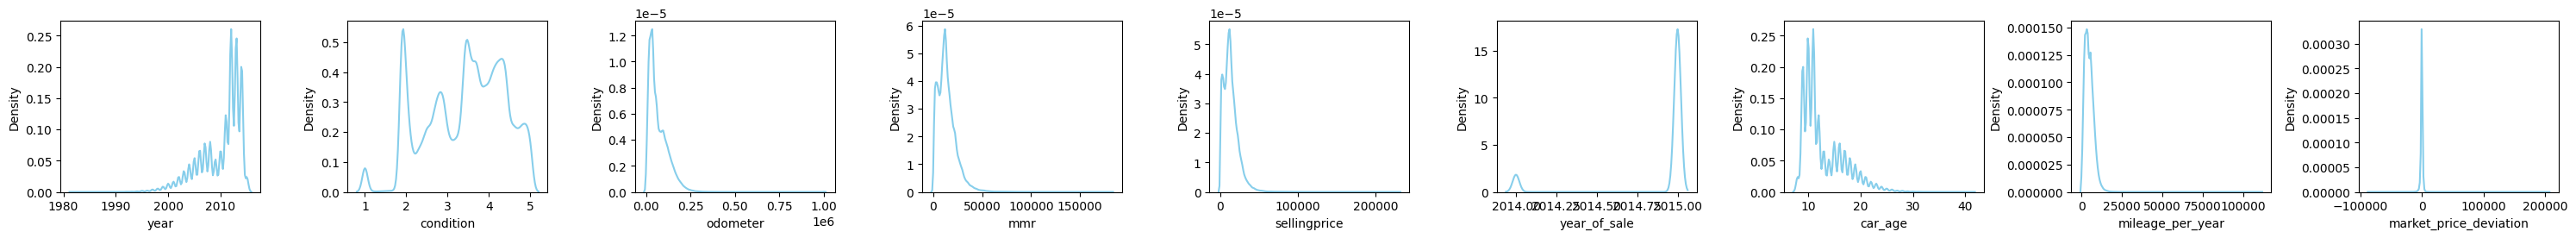

In [706]:
plt.figure(figsize=(30, 5))
for i in range(0, len(num_features)):
    plt.subplot(2, len(num_features), i+1)
    sns.kdeplot(x=car_df[num_features[i]], color='skyblue')
    plt.xlabel(num_features[i])
plt.tight_layout()
plt.show()

Distribution observations:
- As observed in the previous box plot, the year, mmr, and sellingprice columns have skewed distributions, especially in the odometer column,
- The condition column has a multimodal distribution direction where the distribution is close to normal.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Violin Plots for Numericals</b></font></div>

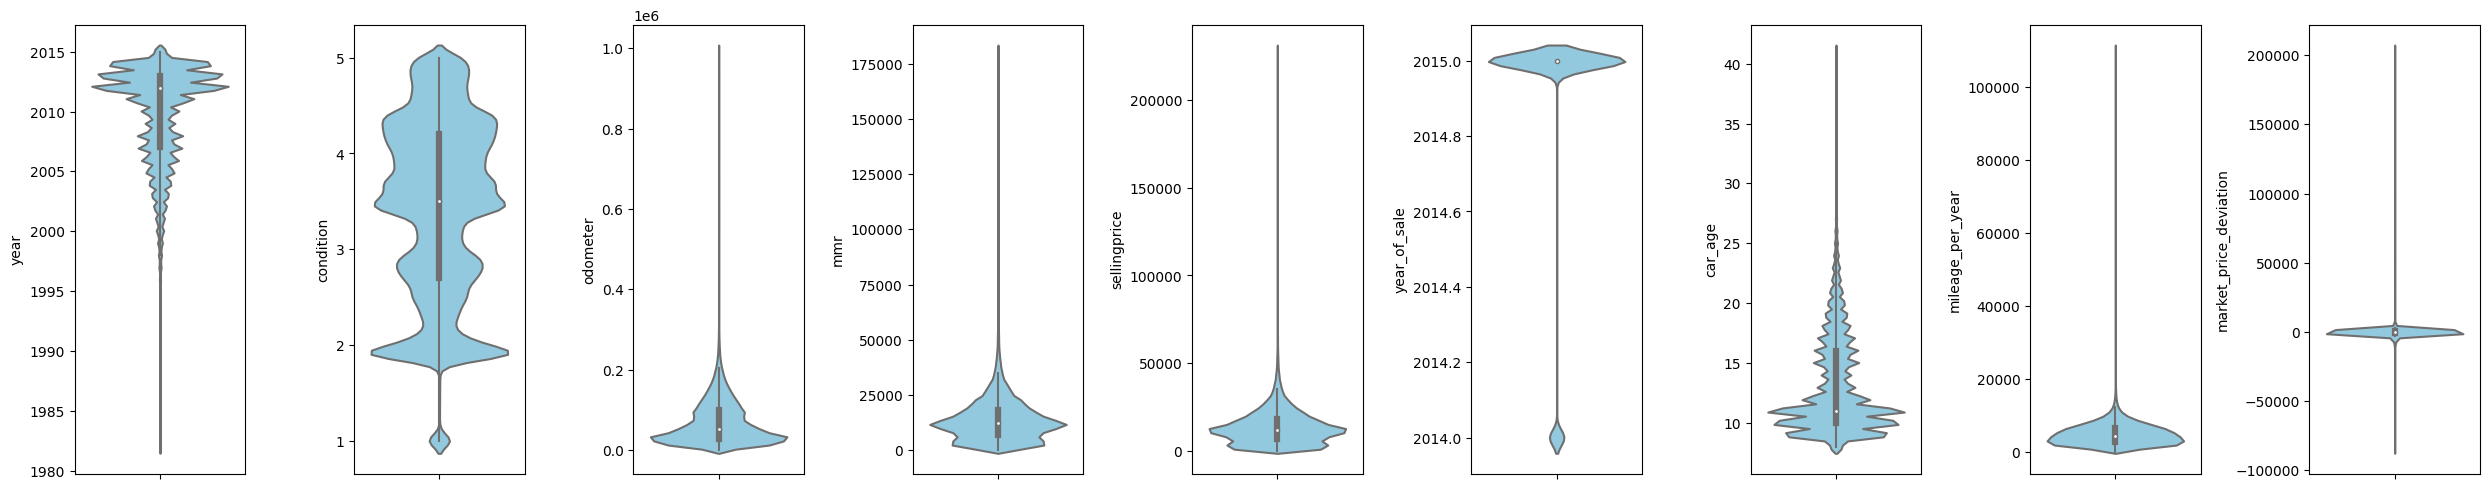

In [707]:
plt.figure(figsize=(25, 5))
for i in range(0, len(num_features)):
    plt.subplot(1, len(num_features), 1+i)
    sns.violinplot(y=car_df[num_features[i]], color='skyblue',  orient= 'v')
plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Count Plots for Categorical</b></font></div>

Upon examining the categorical values, it's evident that these columns contain two distinct categories: one pertaining to car specifications and the other associated with transactional or descriptive details.

In [708]:
cat_1 = ['brand', 'model', 'trim', 'body', 'transmission']  # Variables related to car specifications
cat_2 = ['vin', 'state', 'color', 'interior', 'seller', 'new_saledate_format', 'brand_model']  # Variables related to transactional or descriptive details

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Brand</b></font></div>

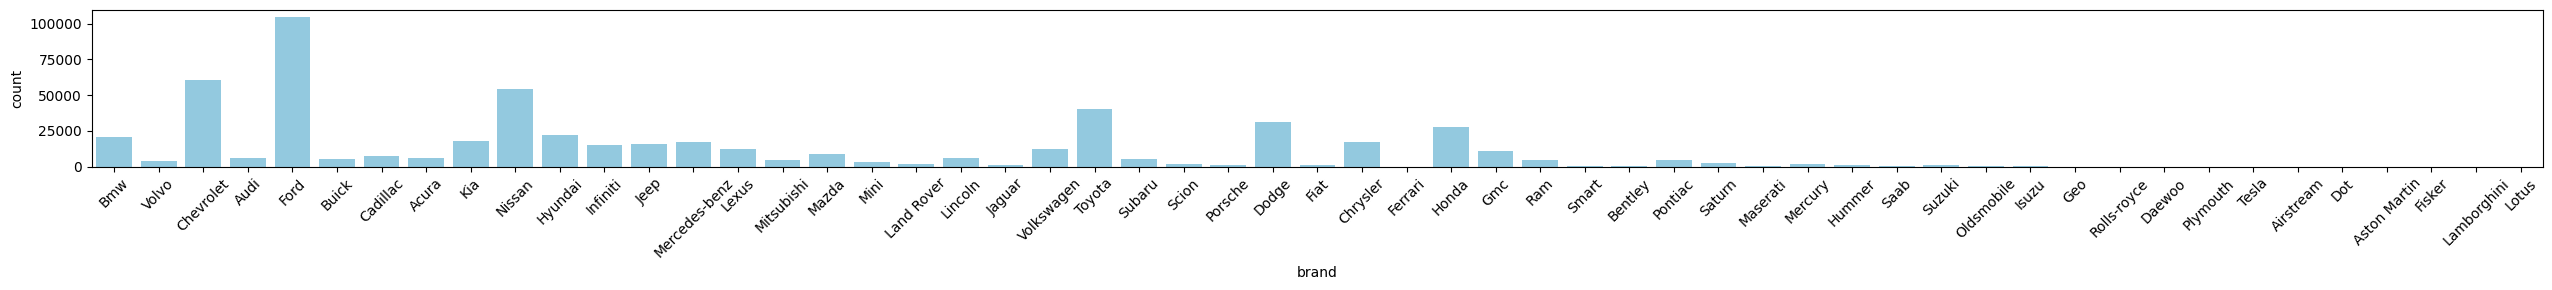

In [709]:
plt.figure(figsize=(75,3))
plt.subplot(1, 3, 1)
sns.countplot(x = car_df['brand'], color='skyblue', orient='v')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Model</b></font></div>

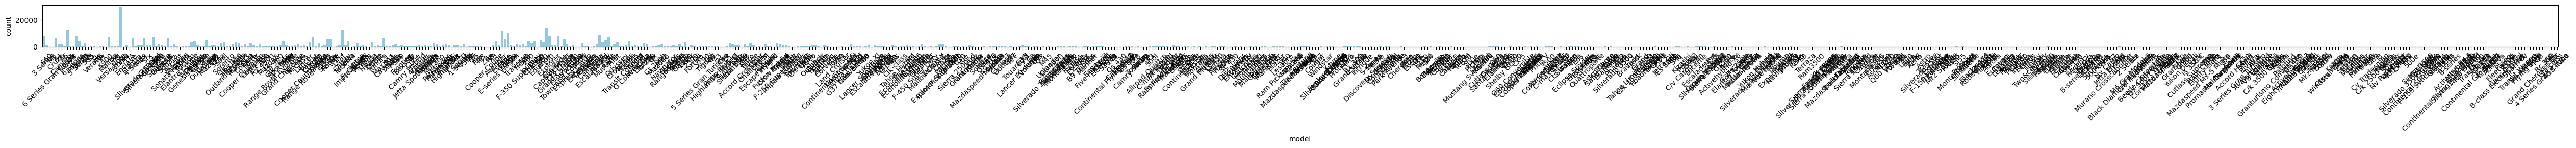

In [710]:
plt.figure(figsize=(150,3))
plt.subplot(1, 3, 1)
sns.countplot(x = car_df['model'], color='skyblue', orient='v')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Trim</b></font></div>

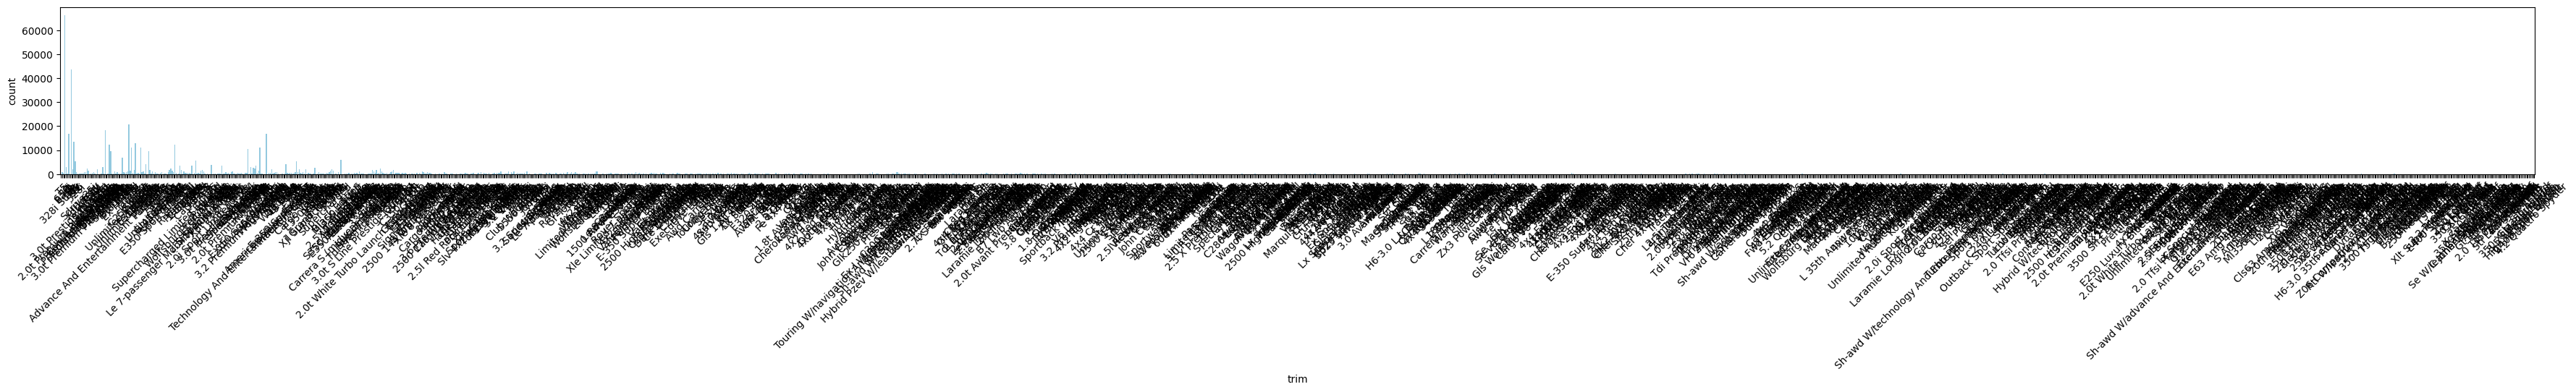

In [711]:
plt.figure(figsize=(150,3))
plt.subplot(1, 3, 1)
sns.countplot(x = car_df['trim'], color='skyblue', orient='v')
plt.xticks(rotation=45)
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Body</b></font></div>

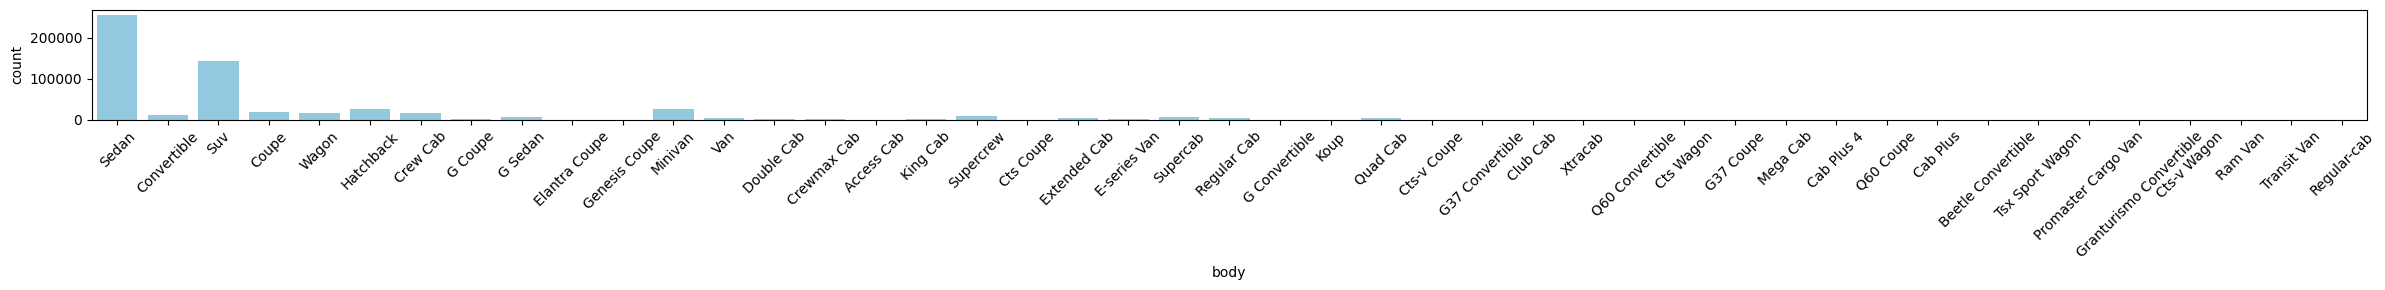

In [712]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = car_df['body'], color='skyblue', orient='v')
plt.xticks(rotation=45)
plt.tight_layout()

### X.3 Cleaning 'body' column: identifying most frequently sold body styles

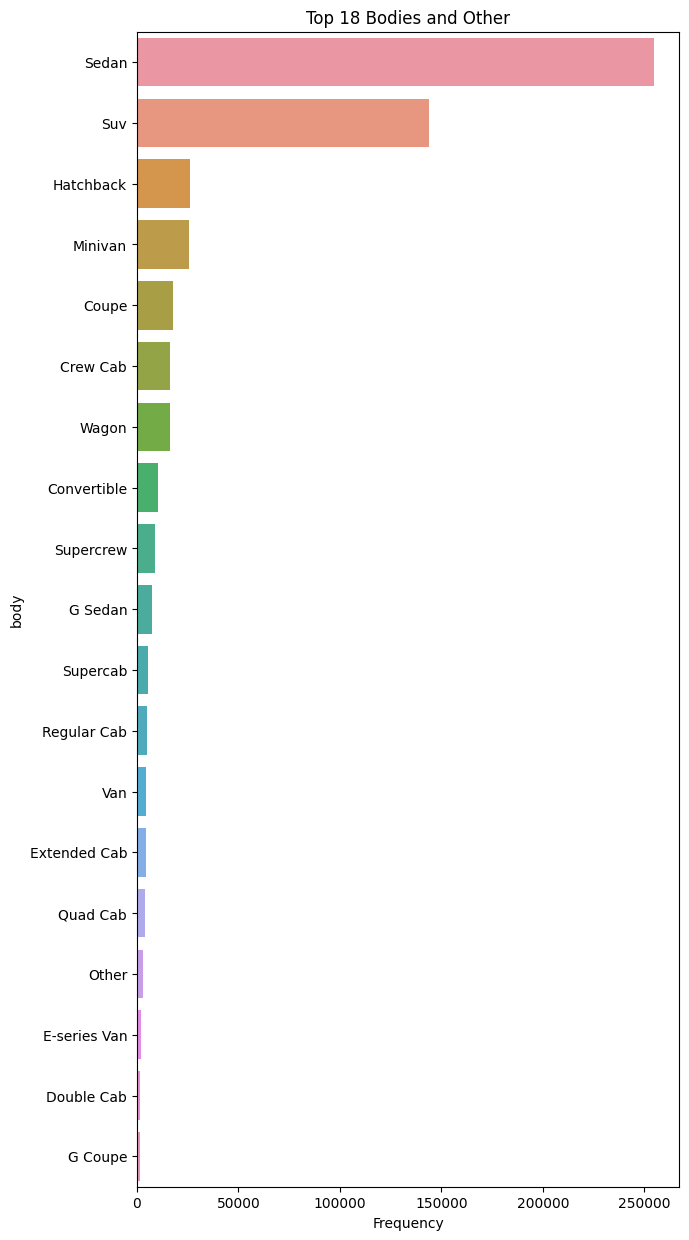

In [713]:
plt.figure(figsize=(7, 15))

# Selecting the top 50 sellers by frequency
top_18_bodies = car_df['body'].value_counts().nlargest(18).index.tolist()


# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['body'] = car_df['body'].apply(lambda x: x if x in top_18_bodies else 'Other')


# Plotting the top 50 sellers based on frequency
sns.countplot(y='body', data=car_df, order=car_df['body'].value_counts().index)
plt.title('Top 18 Bodies and Other')
plt.xlabel('Frequency')
plt.ylabel('body')
plt.show()

## to be done: map the similar body types together

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Transmission</b></font></div>

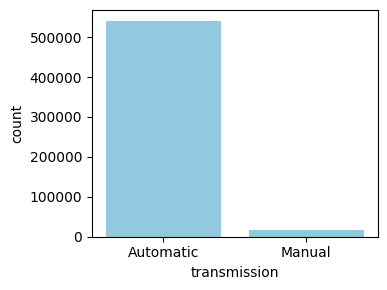

In [714]:
plt.figure(figsize=(10,3))
plt.subplot(1, 3, 1)
sns.countplot(x=car_df['transmission'], color='skyblue', orient='v')
plt.tight_layout()
plt.show()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>States</b></font></div>

### X.2 Cleaning the states aka looking at frequency

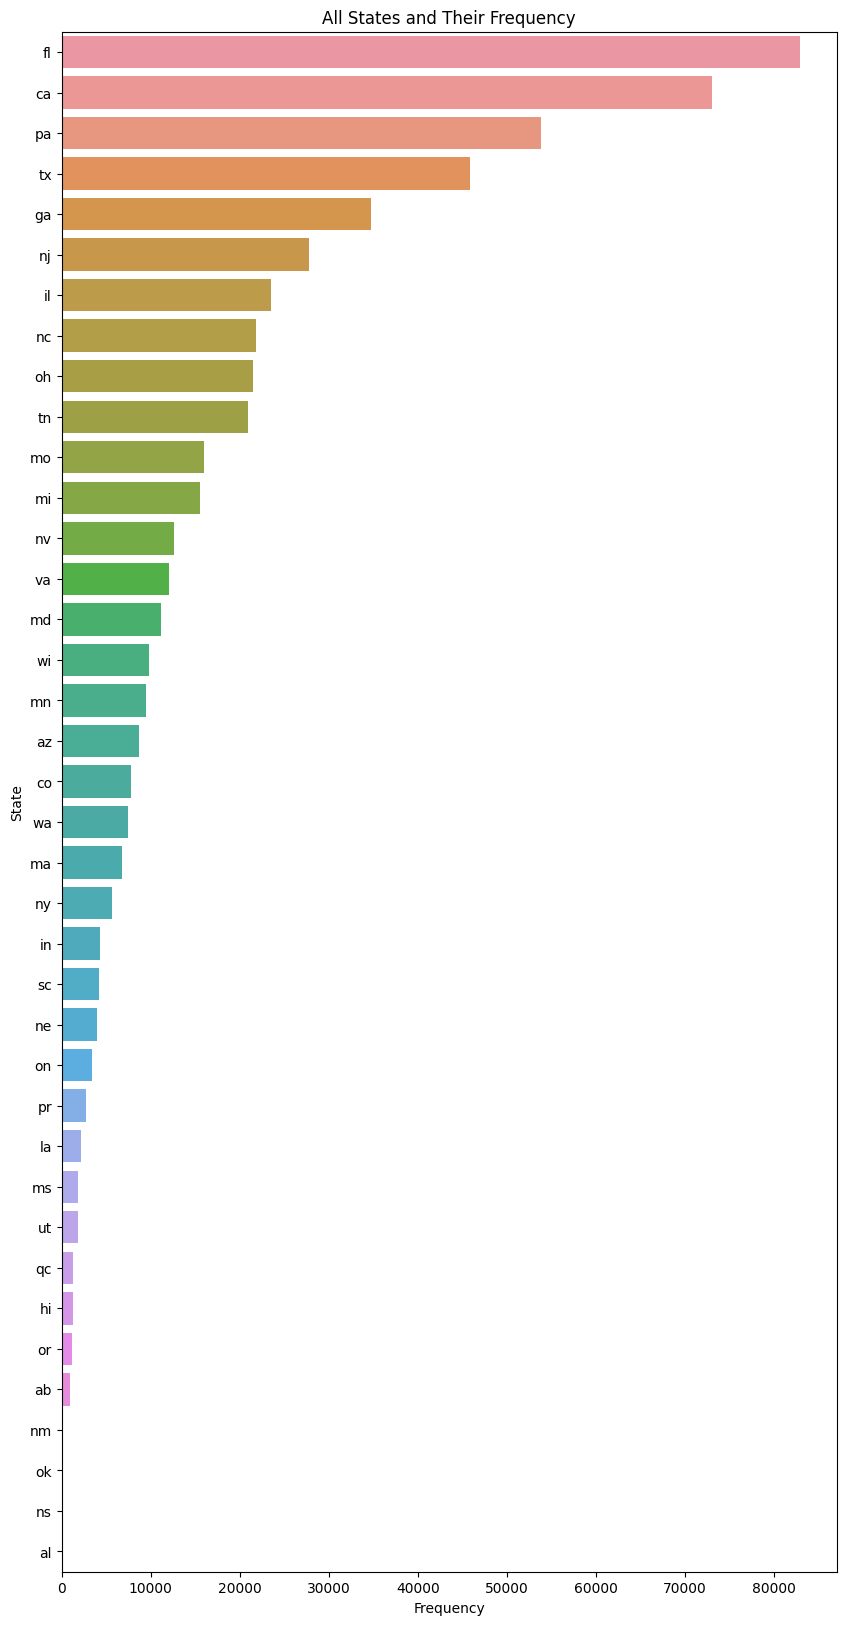

In [715]:
plt.figure(figsize=(10, 20))

# Plotting all states based on frequency
sns.countplot(y='state', data=car_df, order=car_df['state'].value_counts().index)
plt.title('All States and Their Frequency')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

As we see, these are just 38 states, so we can keeep all of them.

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Color</b></font></div>

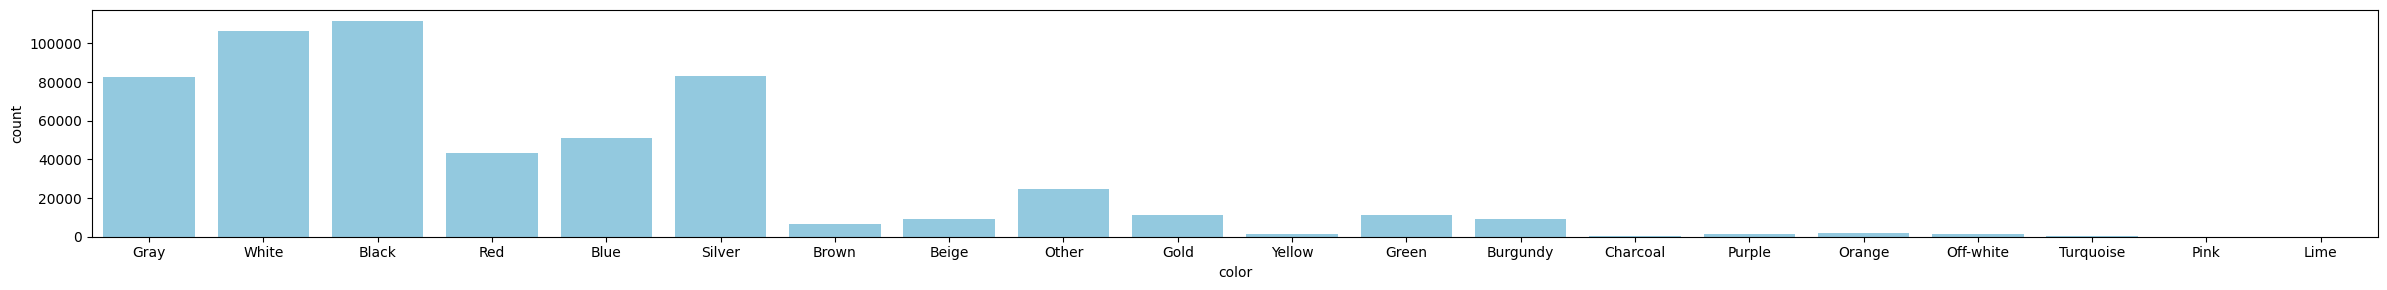

In [716]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = car_df['color'], color='skyblue', orient='v')
plt.tight_layout()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Interior</b></font></div>

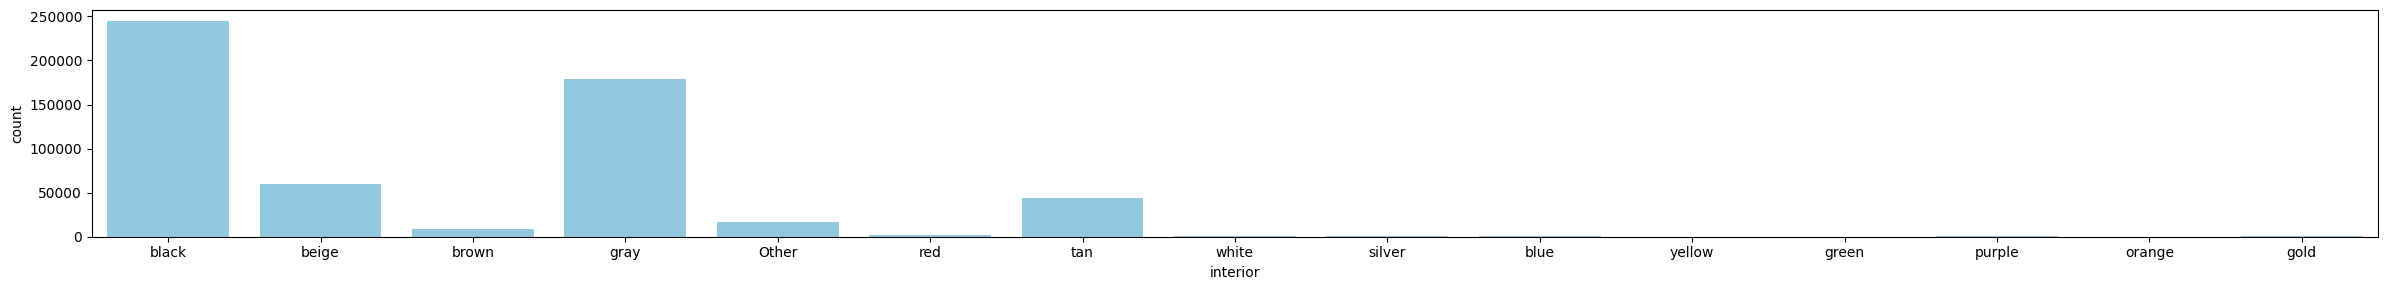

In [717]:
plt.figure(figsize=(70, 3))
plt.subplot(1,3,1)
sns.countplot(x = car_df['interior'], color='skyblue', orient='v')
plt.tight_layout()

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>seller</b></font></div>

### X.X Cleaning the 'sellers': Only looking at the top sellers

Chaning all sellers that are not in the top 50 to 'Other'.

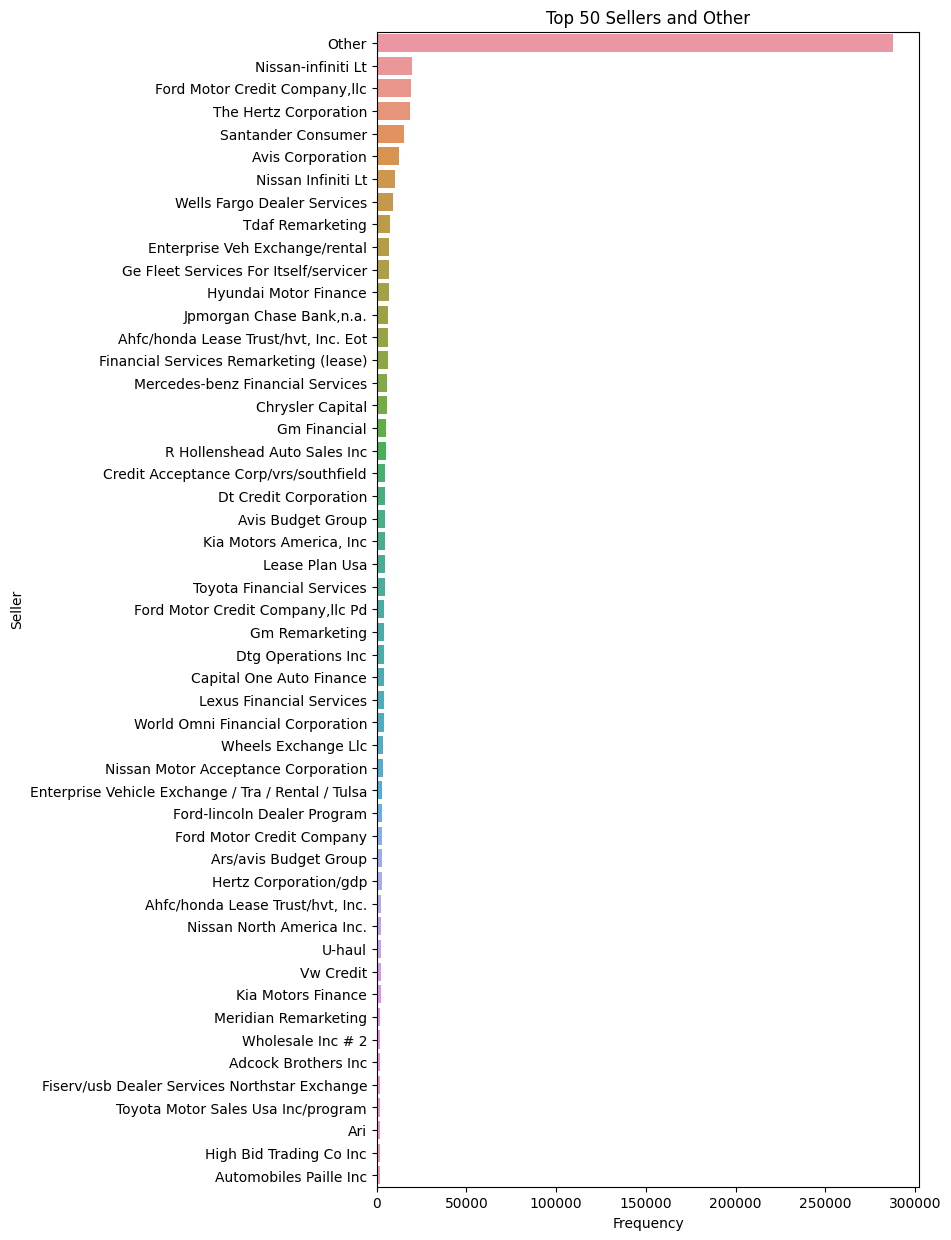

In [718]:
plt.figure(figsize=(7, 15))

# Selecting the top 50 sellers by frequency
top_50_sellers = car_df['seller'].value_counts().nlargest(50).index.tolist()

# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'Other')

# Plotting the top 50 sellers based on frequency
sns.countplot(y='seller', data=car_df, order=car_df['seller'].value_counts().index)
plt.title('Top 50 Sellers and Other')
plt.xlabel('Frequency')
plt.ylabel('Seller')
plt.show()

In [719]:
# Updating sellers that are not in the top 50 to 'Other' in the DataFrame
car_df['seller'] = car_df['seller'].apply(lambda x: x if x in top_50_sellers else 'other')

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Summary of plots cat 1</b></font></div>

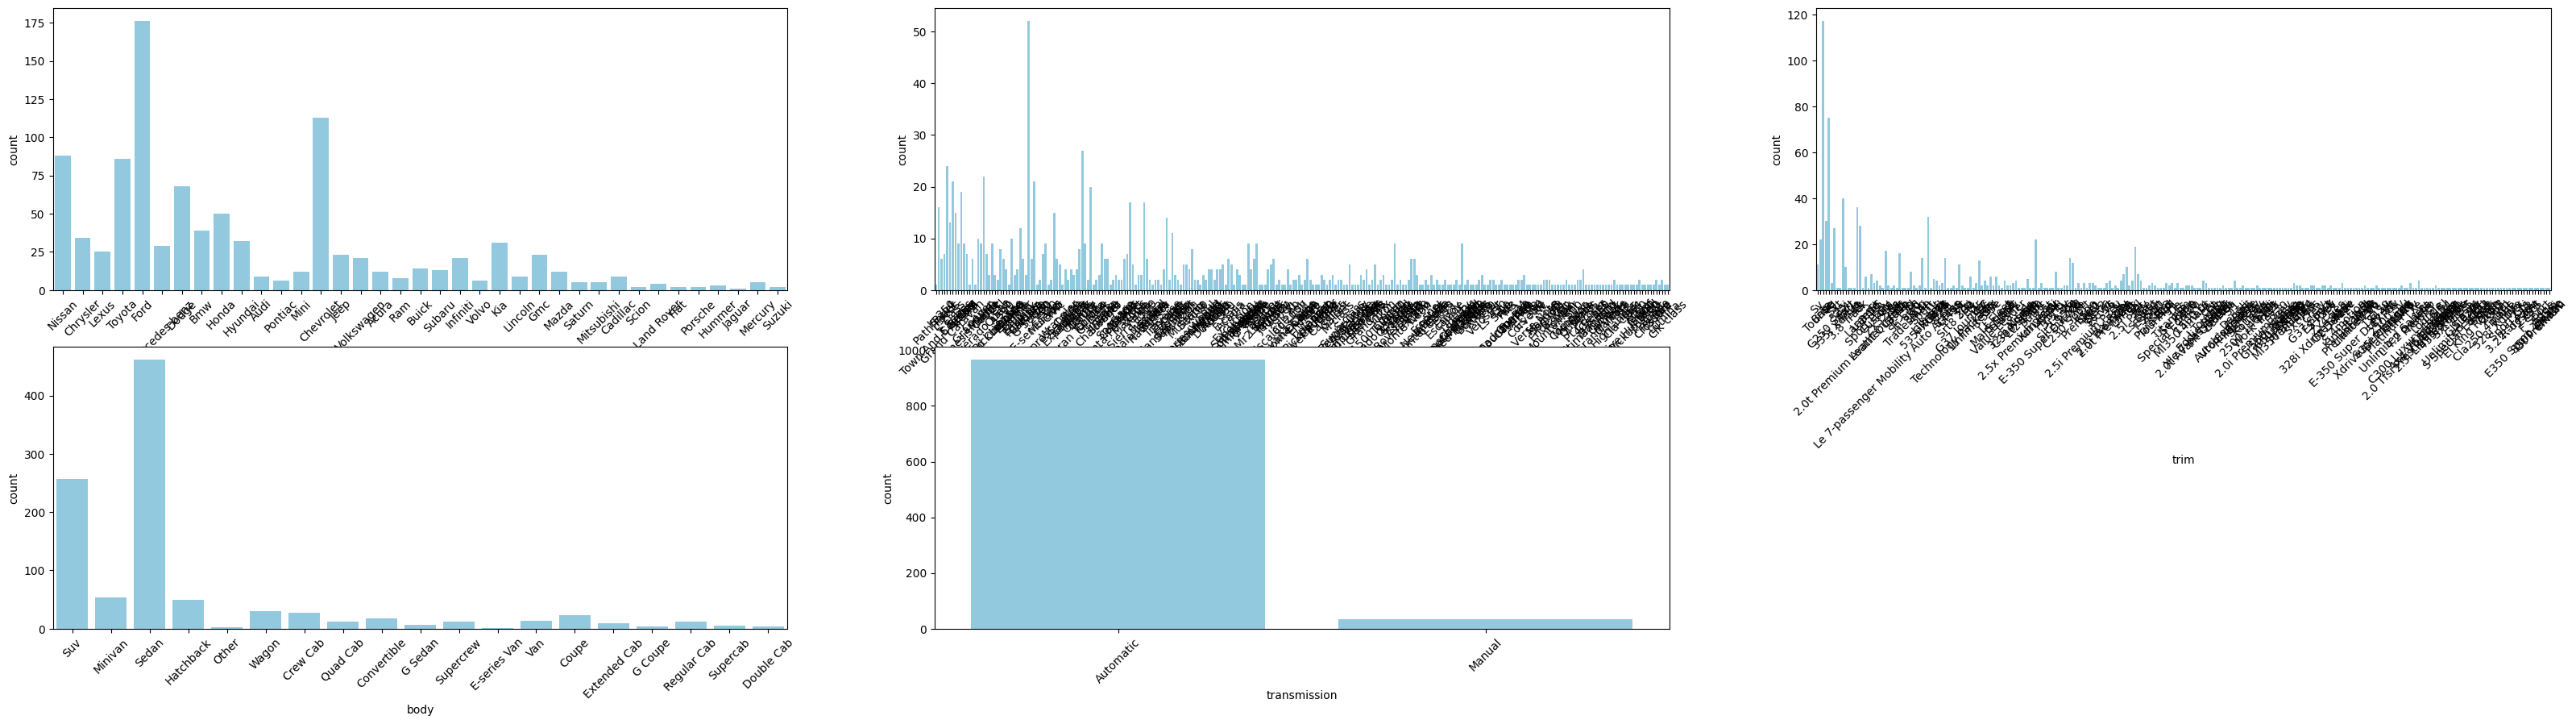

In [720]:
df_sample = car_df.sample(1000, random_state = 123)
plt.figure(figsize=(40, 10))
for i in range(0, len(cat_1)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cat_1[i]], color = 'skyblue')
    plt.xticks(rotation=45)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Summary of plots cat 2</b></font></div>

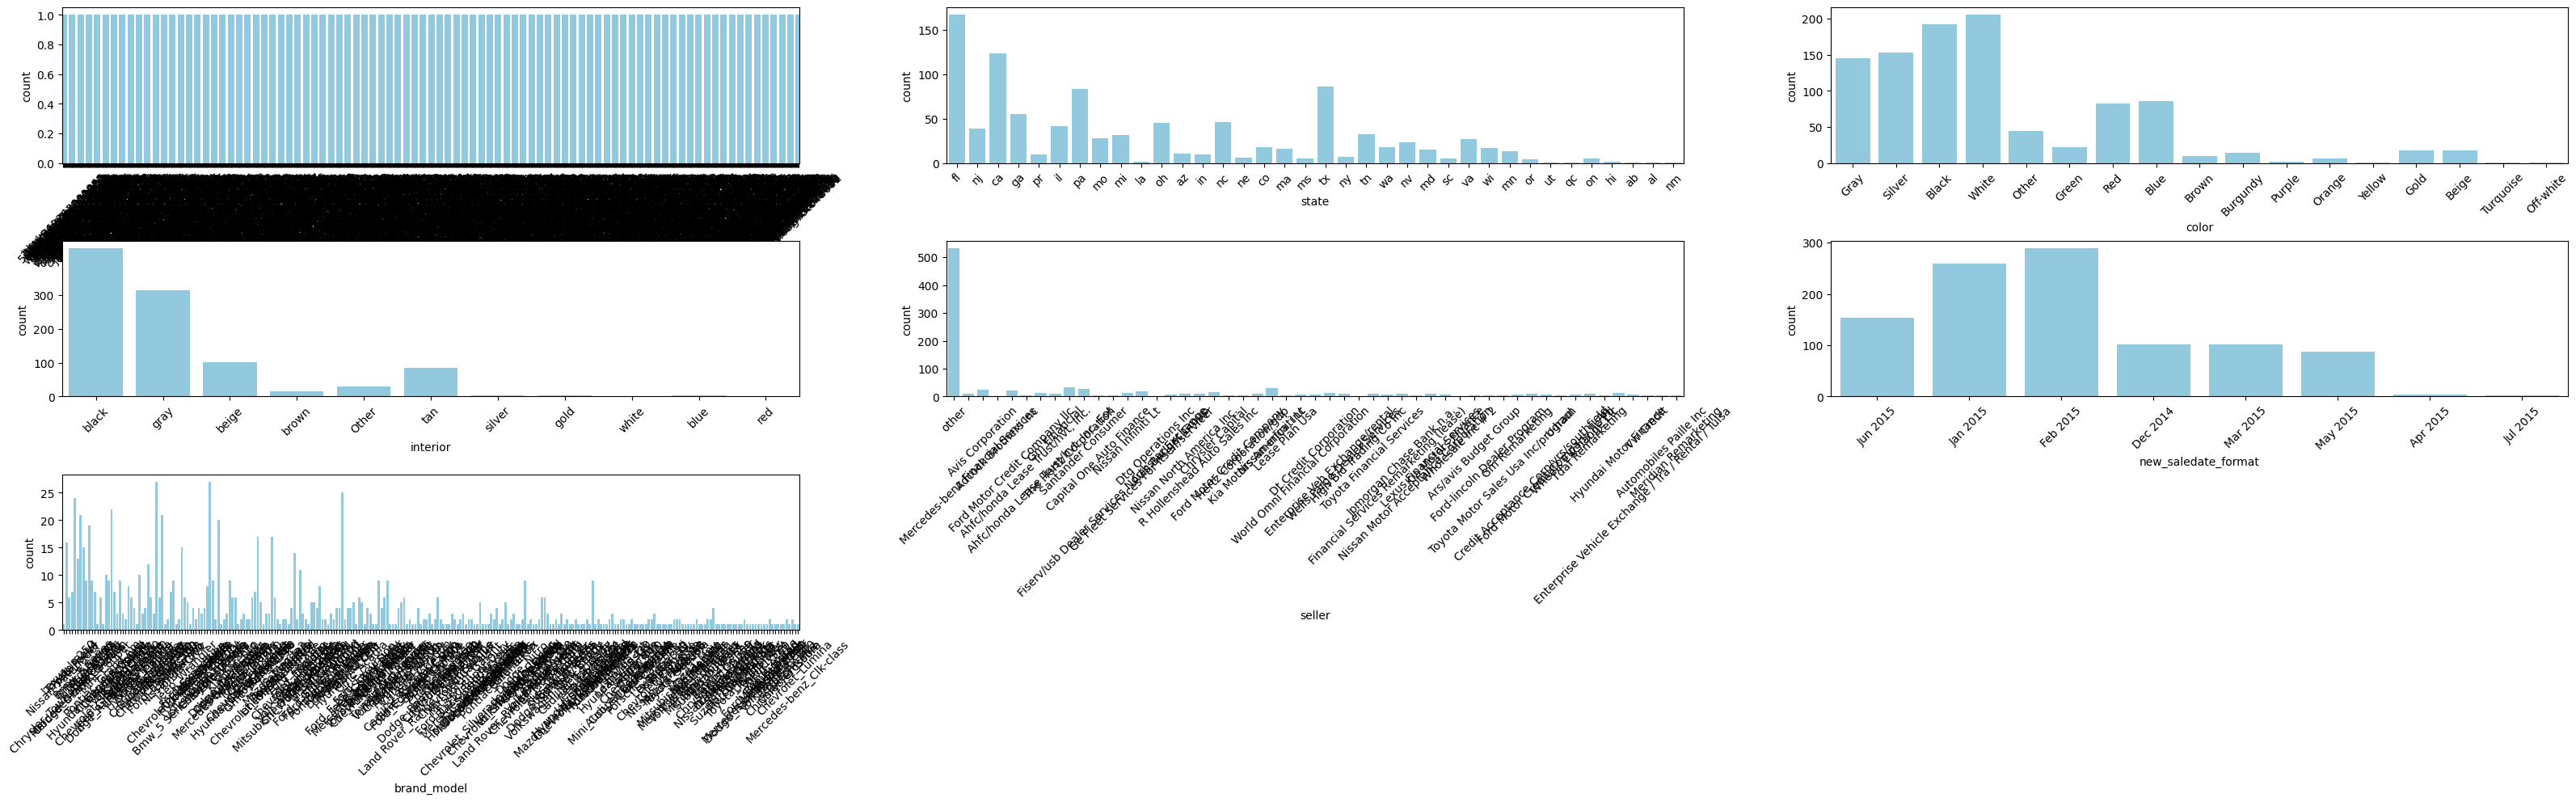

In [721]:
df_sample = car_df.sample(1000, random_state = 123)
plt.figure(figsize=(40, 10))
for i in range(0, len(cat_2)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df_sample[cat_2[i]], color = 'skyblue', orient = 'v')
    plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5)  # Adjust the height space between subplots
# plt.tight_layout()
plt.show()

Observations countplots:
- The make, model, trim, body, vin, state, colour, interior, seller, new_saledate_format, and brand_model columns have very many categories, so it is necessary to review the columns that will be targeted in modelling,
- Transmission column is dominated by automatic

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Correlation</b></font></div>

In [722]:
car_df[numerical_col].corr()

year  condition  odometer       mmr  sellingprice  \
year                    1.000000   0.537195 -0.772295  0.596562      0.586478   
condition               0.537195   1.000000 -0.527159  0.479635      0.532940   
odometer               -0.772295  -0.527159  1.000000 -0.587974     -0.582316   
mmr                     0.596562   0.479635 -0.587974  1.000000      0.983653   
sellingprice            0.586478   0.532940 -0.582316  0.983653      1.000000   
year_of_sale            0.115908   0.032750 -0.087577  0.074945      0.078500   
car_age                -1.000000  -0.537195  0.772295 -0.596562     -0.586478   
mileage_per_year       -0.522473  -0.448844  0.919996 -0.507728     -0.505525   
market_price_deviation -0.032137   0.314764  0.007933 -0.050788      0.129883   

                        year_of_sale   car_age  mileage_per_year  \
year                        0.115908 -1.000000         -0.522473   
condition                   0.032750 -0.537195         -0.448844   
odometer                   -0.087577  0.772295          0.919996   
mmr                         0.074945 -0.596562         -0.507728   
sellingprice                0.078500 -0.586478         -0.505525   
year_of_sale                1.000000 -0.115908         -0.055835   
car_age                    -0.115908  1.000000          0.522473   
mileage_per_year           -0.055835  0.522473          1.000000   
market_price_deviation      0.022706  0.032137         -0.008025   

                        market_price_deviation  
year                                 -0.032137  
condition                             0.314764  
odometer                              0.007933  
mmr                                  -0.050788  
sellingprice                          0.129883  
year_of_sale                          0.022706  
car_age                               0.032137  
mileage_per_year                     -0.008025  
market_price_deviation                1.000000

<Axes: >

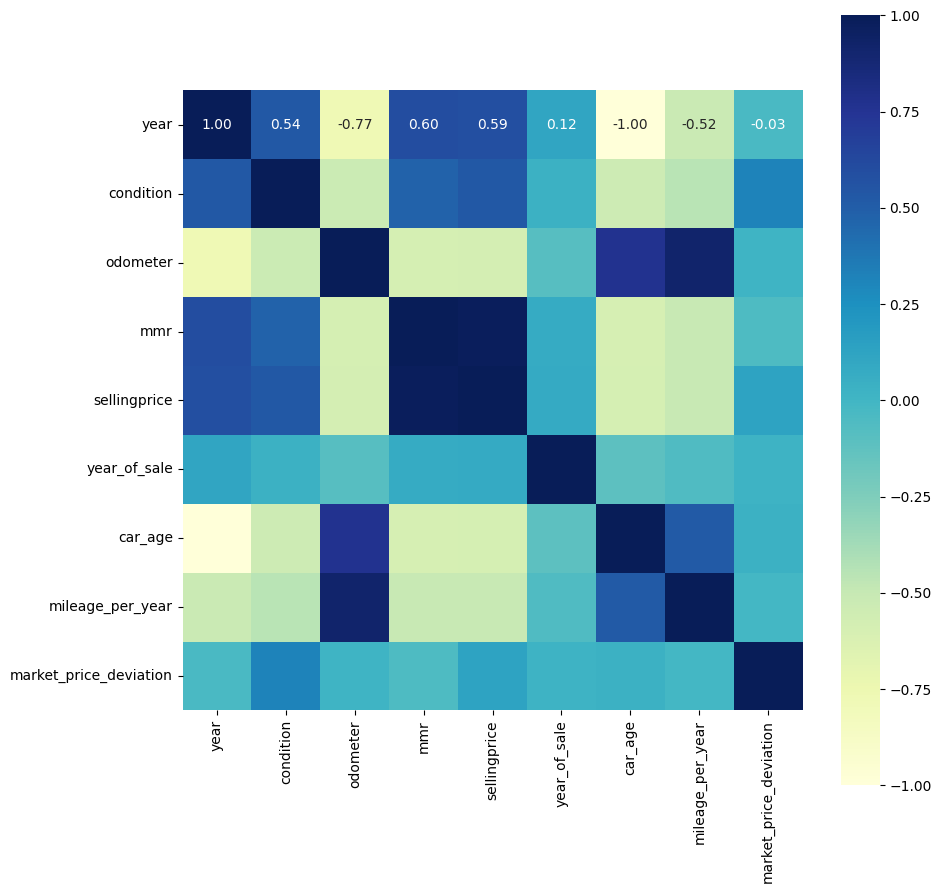

In [723]:
# Selecting the numerical columns
numerical_cols = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'year_of_sale', 'car_age', 'mileage_per_year', 'market_price_deviation']

# Creating a correlation matrix for the selected numerical columns
numerical_corr = car_df[numerical_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_corr, cmap='YlGnBu', fmt='.2f', square=True, annot=True)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Pair Plot</b></font></div>

<Figure size 1500x1500 with 0 Axes>

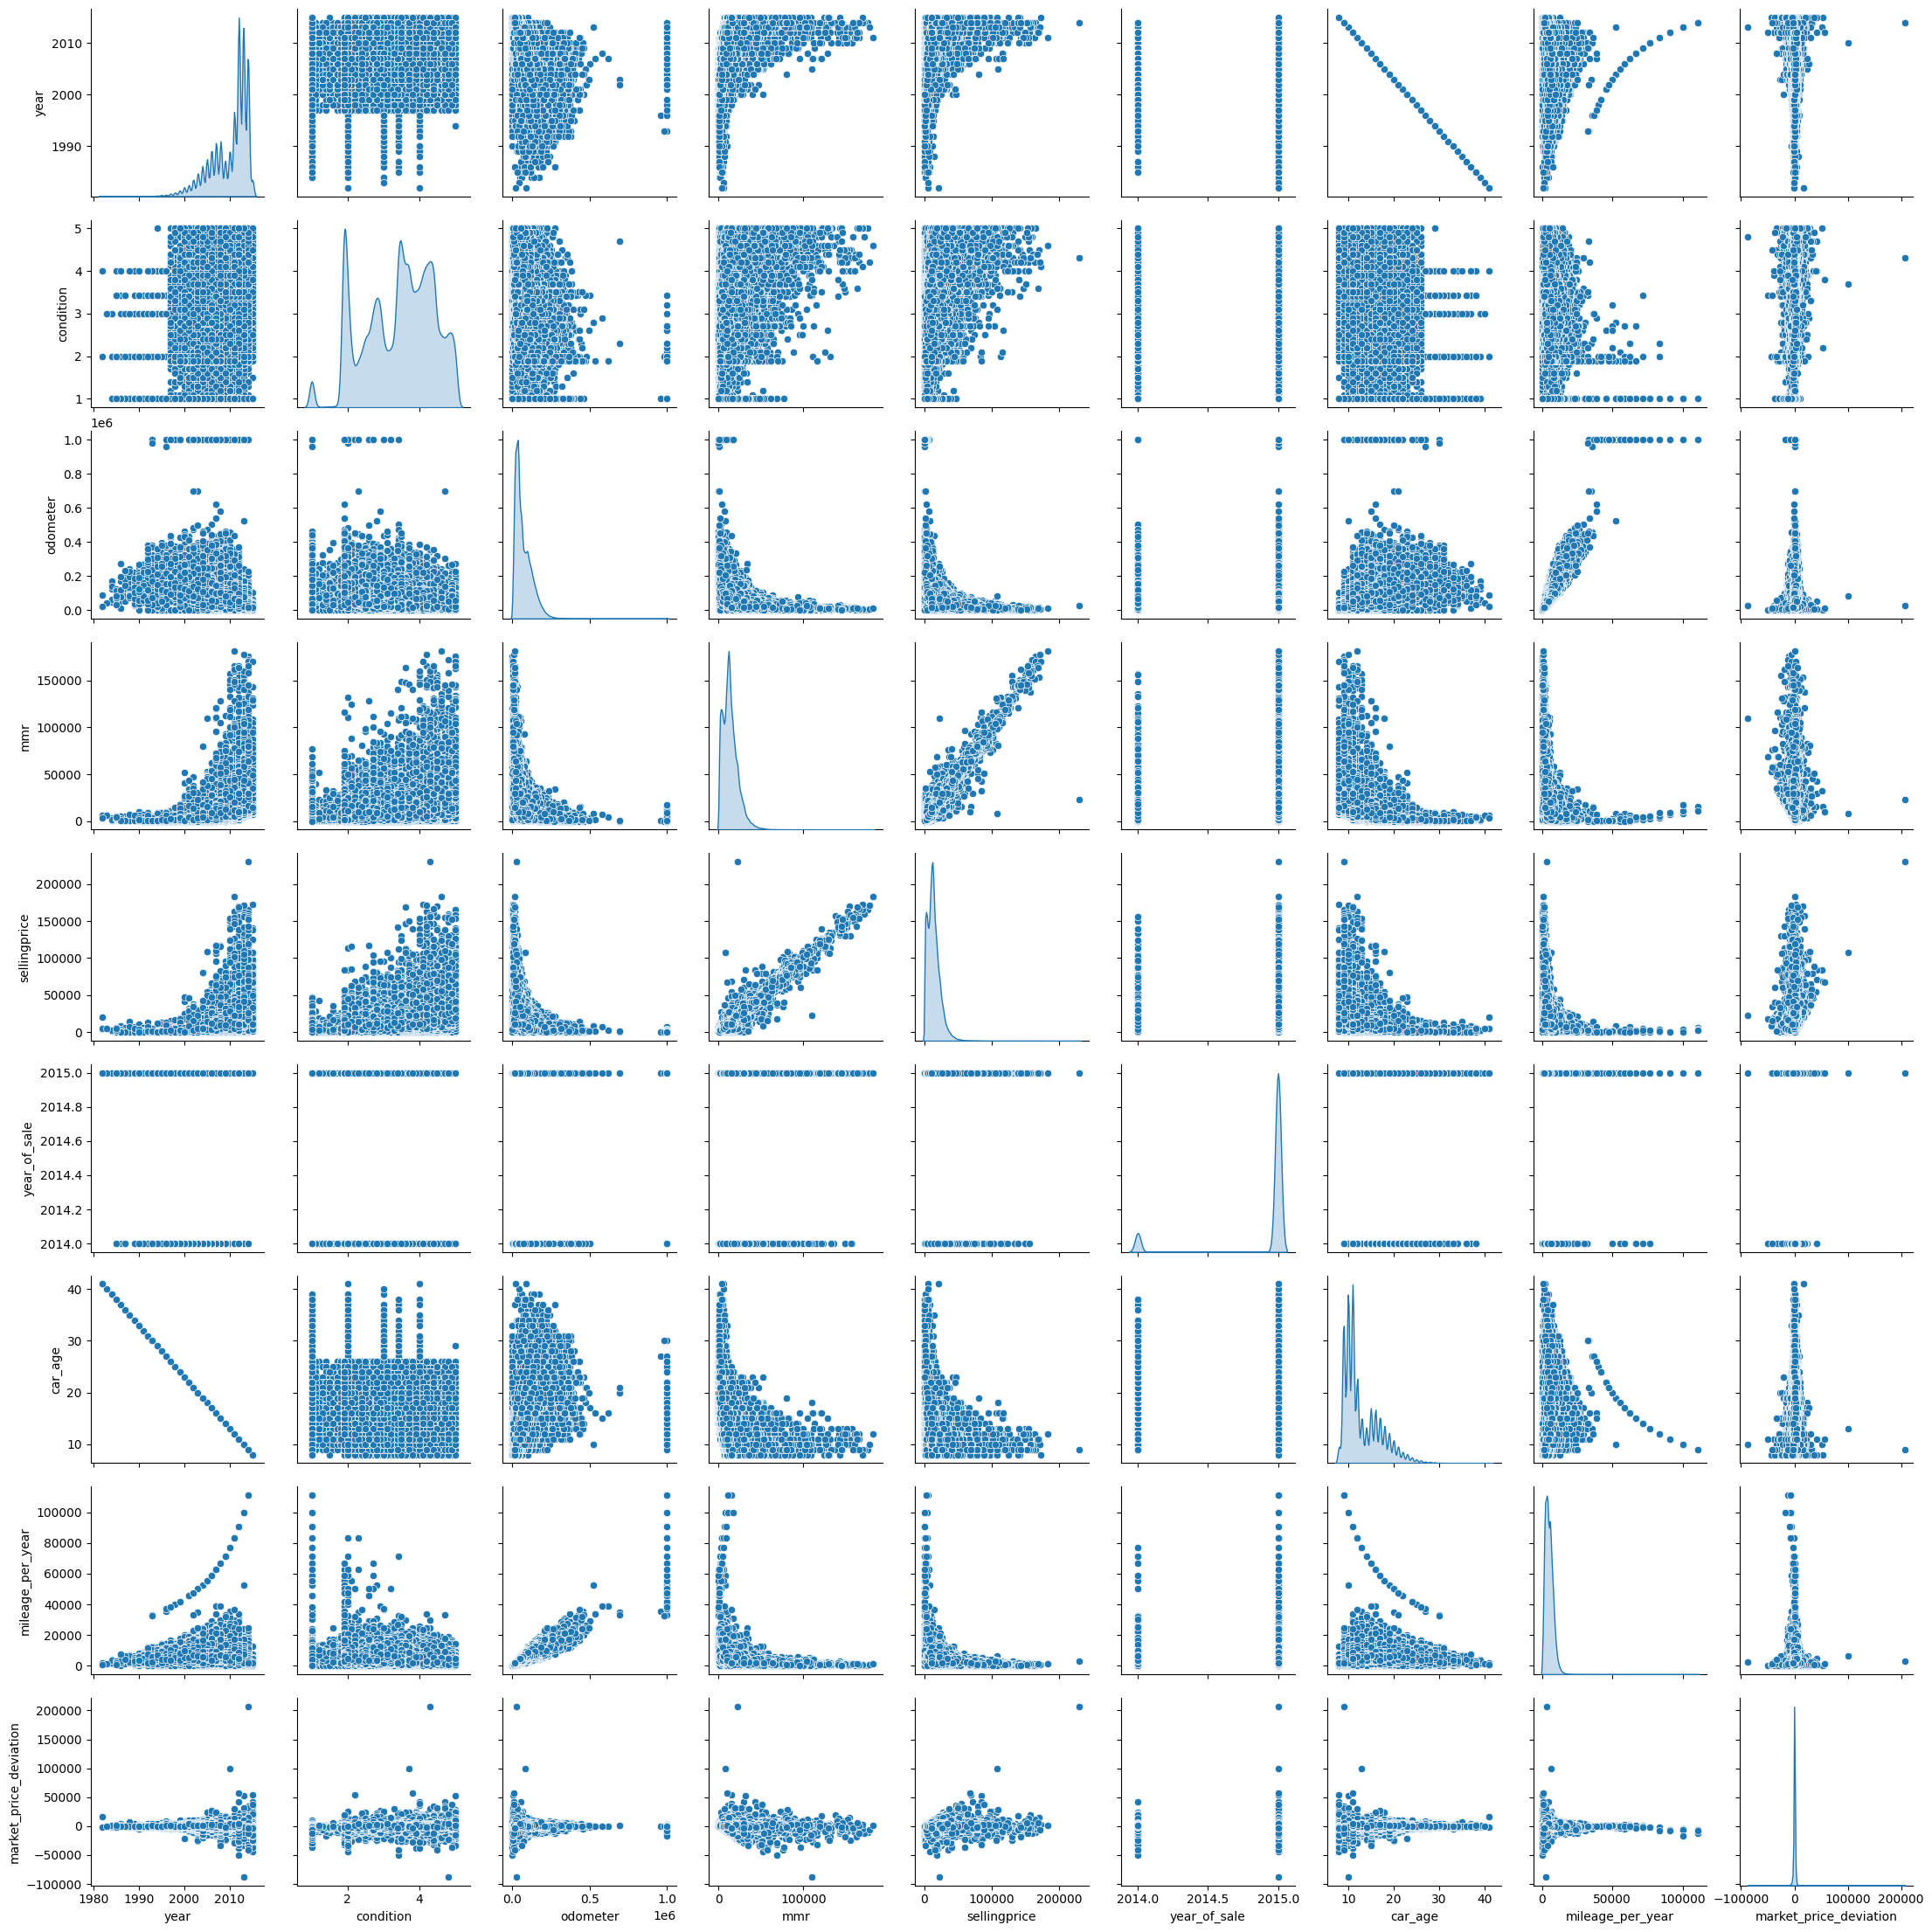

In [724]:
plt.figure(figsize=(15, 15))
sns.pairplot(car_df, diag_kind='kde')

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car brands</b></font></div>

In [725]:
def top_categories(df, column_name, top_n=10):
    top_categories = df[column_name].value_counts().head(top_n).index
    top_categories_data = df[df[column_name].isin(top_categories)]

    sns.kdeplot(x='sellingprice', hue=column_name, data=top_categories_data, legend=True)
    plt.title(f'Selling Prices for Top {top_n} {column_name.capitalize()}s', fontsize=16)
    plt.xlabel('Selling Price')
    plt.ylabel('Density')
    plt.show()

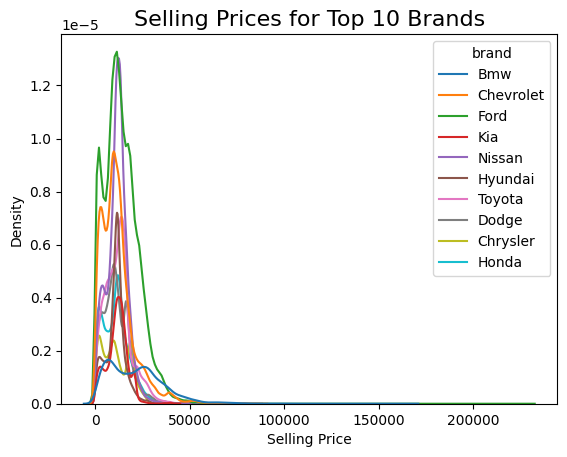

In [726]:
top_categories(car_df, 'brand', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car model</b></font></div>

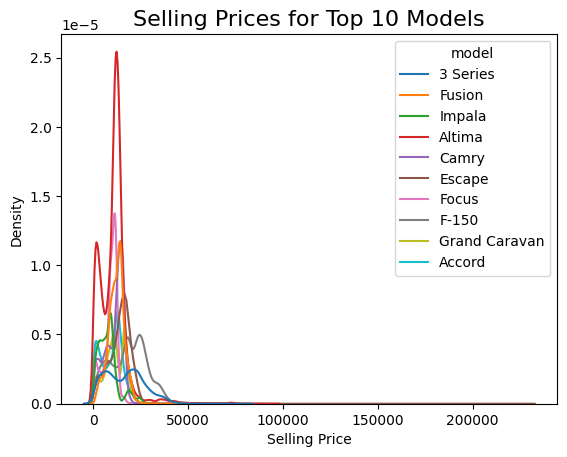

In [727]:
top_categories(car_df, 'model', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car trim</b></font></div>

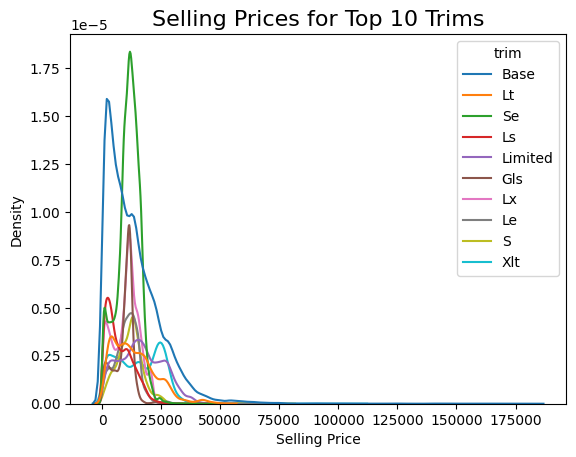

In [728]:
top_categories(car_df, 'trim', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car body</b></font></div>

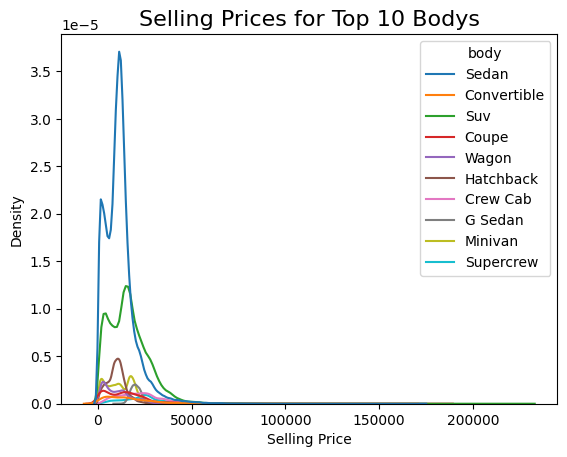

In [729]:
top_categories(car_df, 'body', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car transmission</b></font></div>

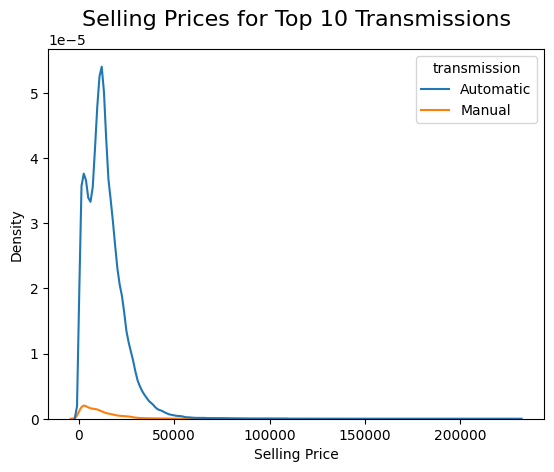

In [730]:
top_categories(car_df, 'transmission', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car state</b></font></div>

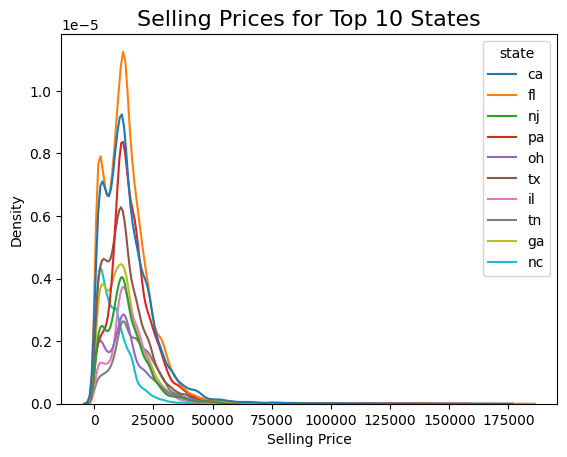

In [731]:
top_categories(car_df, 'state', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car color</b></font></div>

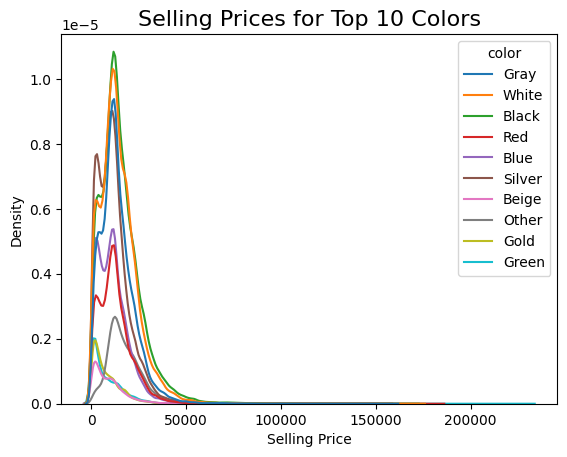

In [732]:
top_categories(car_df, 'color', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car interior</b></font></div>

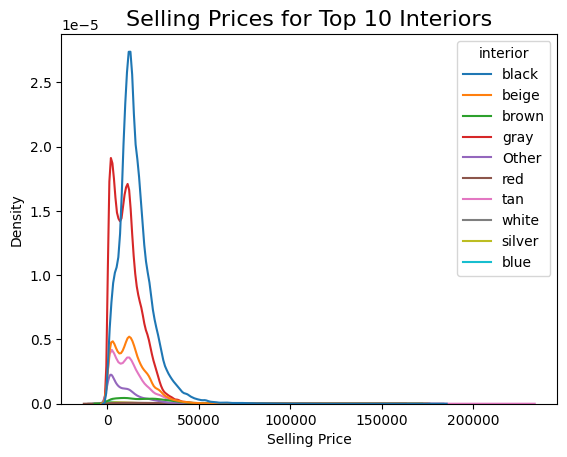

In [733]:
top_categories(car_df, 'interior', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car seller</b></font></div>

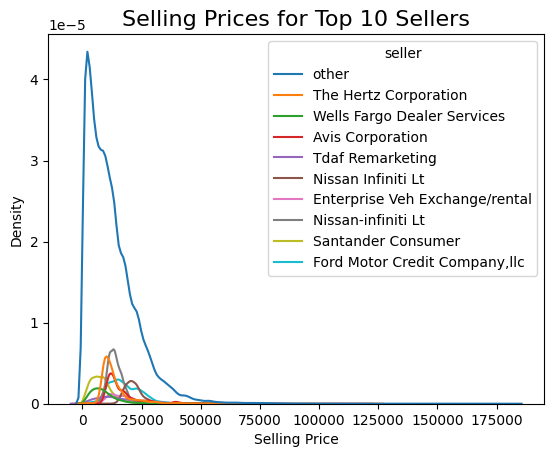

In [734]:
top_categories(car_df, 'seller', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car new_saledate_format</b></font></div>

/var/folders/65/5zkp1bys09s2tm2tg0bqn9wc0000gn/T/ipykernel_7329/1418377918.py:5: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



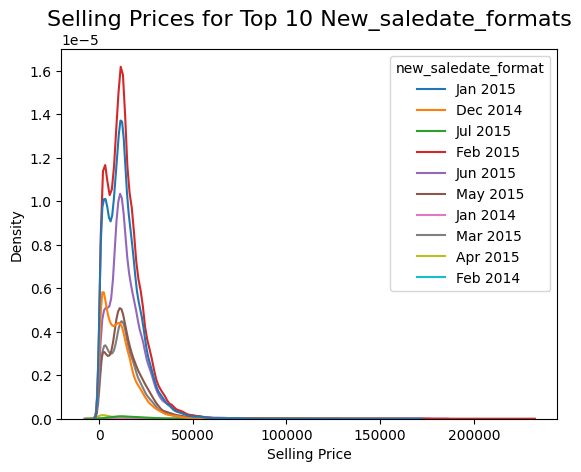

In [735]:
top_categories(car_df, 'new_saledate_format', top_n=10)

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Top 10 sold car brand_model</b></font></div>

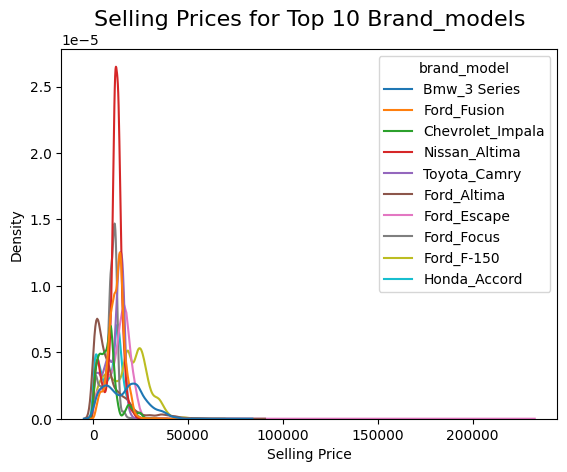

In [736]:
top_categories(car_df, 'brand_model', top_n=10)

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 5</span>
    <h1 style="font-size: 30px;">Business Intelligence</h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Price segmentation</b></font></div>

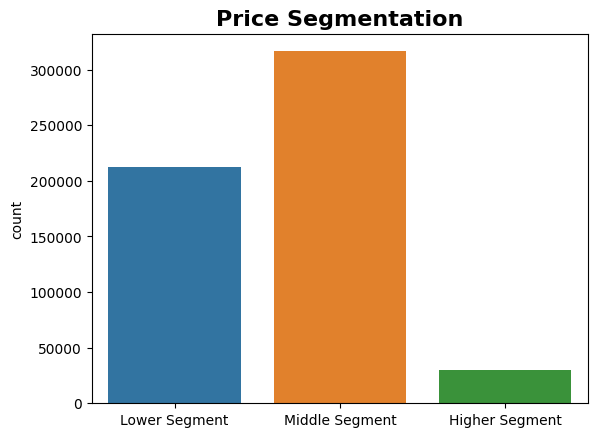

In [737]:
price_segmentation = np.where(car_df['sellingprice']<10000, 'Lower Segment', np.where(car_df['sellingprice']>30000, 'Higher Segment', 'Middle Segment'))
segment_order = ['Lower Segment', 'Middle Segment', 'Higher Segment']
plt.title('Price Segmentation', fontsize = 16, fontweight = 'bold')
plot = sns.countplot(x=price_segmentation, order= segment_order, data = car_df)
plot.set_ylabel('count')  
plt.show()

## <font color='gold'>**for each column you should decide how to limit the number of unique values **</font>:

- for brand model and trim it is normal to have large number
- create a new feature "Brand-Model Combination" 
- for budy type, and state and seller plot them based on frequency and keep most the repeatitive onces and replace the value of the rest to "Other" 
- for vin you can check how many cars are sold more than once and aggregate those rows 
- for color and interior you can merge similar colors and for low frequent colors replace them with "other"

=--
- convert correct saledate to correct format and just keep month and day and year
- create a new feature "car_age" with year and saledate 

GPT Suggestions for other features : 
- Mileage per Year (from 'year' and 'odometer'): High mileage can decrease a car's value. Calculate the average annual mileage by dividing the odometer reading by the car's age. This accounts for the car's usage intensity.
- Market Price Deviation (from 'mmr' - Market Price and 'sellingprice'): You could calculate the deviation of the selling price from the market price (mmr) as a feature, which might help in understanding how prices vary from the expected market value.


## <font color='red'>**1. EDA**</font>

In [738]:
# numerical_corr["sellingprice"].sort_values(ascending=False)

In [739]:
# # Selecting numerical columns of interest
# numerical_columns = ['mmr', 'year', 'condition', 'odometer', 'sellingprice']

# # Calculating Pearson correlation
# pearson_corr = car_df[numerical_columns].corr(method='pearson')['sellingprice'].sort_values(ascending=False)

# # Calculating Spearman correlation
# spearman_corr = car_df[numerical_columns].corr(method='spearman')['sellingprice'].sort_values(ascending=False)

# print("Pearson correlation of numerical variables with 'sellingprice':")
# print(pearson_corr)

# print("\nSpearman correlation of numerical variables with 'sellingprice':")
# print(spearman_corr)

The correlation coefficients (Pearson and Spearman) between the numerical variables and the 'sellingprice' provide insights into the relationships between these variables:

1. Pearson Correlation:
    - The 'sellingprice' has a very strong positive correlation with 'mmr' (0.984), suggesting a high linear relationship between the maximum retail price ('mmr') and the selling price.
    - A moderately positive correlation exists between 'sellingprice' and 'year' (0.586) and 'condition' (0.539). This indicates that newer years and better conditions tend to be associated with higher selling prices, but the relationship is not as strong as with 'mmr'.
    - 'Sellingprice' has a moderately negative correlation with 'odometer' (-0.582), implying that as the odometer reading increases (indicating higher mileage), the selling price tends to decrease.

2. Spearman Correlation:
    - The Spearman correlation coefficients show similar trends to the Pearson correlation, but they consider monotonic relationships rather than just linear ones.
    - 'mmr' demonstrates a very strong positive monotonic relationship with 'sellingprice' (0.979).
    - 'Year', 'condition', and 'odometer' also show relatively strong positive and negative monotonic relationships with 'sellingprice', similar to Pearson correlations but considering non-linear associations.

Conclusions:
- Both Pearson and Spearman correlations indicate that 'mmr' has the strongest association with 'sellingprice', suggesting that the maximum retail price is highly influential in determining the selling price of cars.
- 'Year' and 'condition' have moderate positive associations, indicating that newer vehicles in better condition tend to have higher selling prices.
- Conversely, 'odometer' (indicating higher mileage) has a moderate negative association, meaning that increased mileage tends to decrease the selling price.

Correlation does not imply causation, and other factors not considered here might influence the selling price of cars. These correlation coefficients provide valuable insights into the relationships between these variables but do not establish causative relationships.

In [740]:
# #Comparing different features to the price
# categrical_columns=['brand', 'body', 'transmission', 'state', 'color', 'interior']
# plt.figure(figsize=(12,8))
# for feature in categrical_columns:
#     plt.subplot(3, 3, categrical_columns.index(feature) + 1)
#     sns.barplot(data=car_df, x=feature, y='sellingprice')
#     plt.title(f'{feature} vs. Price')
# plt.tight_layout()
# plt.show()

In [741]:
# #Checking the top 10 and bottom 10 cars that are auctioned
# top_10_brands = car_df['brand'].value_counts().nlargest(10)
# bottom_10_brands = car_df['brand'].value_counts().nsmallest(10)

# #Plotting both top 10 and bottom 10 brands in one figure
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# #Plotting the top 10 brands
# axes[0].bar(top_10_brands.index, top_10_brands, color='darkblue')
# axes[0].set_title('Top 10 Car Brands')
# axes[0].set_xlabel('Brands')
# axes[0].set_ylabel('Frequency')
# axes[0].tick_params(axis='x', rotation=45)

# #Plotting the bottom 10 brands
# axes[1].bar(bottom_10_brands.index, bottom_10_brands, color='darkred')
# axes[1].set_title('Bottom 10 Car Brands')
# axes[1].set_xlabel('Brands')
# axes[1].set_ylabel('Frequency')
# axes[1].tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()

In [742]:
# #Count the occurrences of each body type
# body_counts = car_df['body'].value_counts()

# #Get the top 10 body types
# top_10_bodies = body_counts.head(10)

# #Sum the counts of the body types not in the top 10
# other_count = body_counts[10:].sum()

# #Create a DataFrame with the top 10 bodies
# top_bodies_df = pd.DataFrame({
#     'body': top_10_bodies.index,
#     'percent': top_10_bodies.values / len(car_df)
# })

# #Calculate 'Other' category and create its DataFrame
# other_df = pd.DataFrame({'body': ['Other'], 'percent': [other_count / len(car_df)]})

# #Concatenate top 10 bodies DataFrame and 'Other' DataFrame
# combined_df = pd.concat([top_bodies_df, other_df], ignore_index=True)

# #Create the pie chart using Plotly
# fig = px.pie(
#     combined_df,
#     names='body',
#     values='percent',
#     title='Top 10 Body Types and Others',
#     width=600,
#     height=500
# )

# fig.show()

In [743]:
# # Grouping by 'brand' and getting count of cars sold
# cars_count = car_df['brand'].value_counts()

# # Selecting top 10 car brands based on max selling price
# top_car_brands = cars_count.head(10)

# # Plotting a bar chart showing max selling price for top 10 car brands
# plt.figure(figsize=(12, 6))

# # Subplot for the bar chart
# plt.subplot(1, 2, 1)
# sns.barplot(x=top_car_brands.values, y=top_car_brands.index, palette='viridis')
# plt.title('Top 10 Car Models by Max Price')
# plt.xlabel('Max Price')
# plt.ylabel('Car Model')

# # Subplot for the table showing count of cars sold
# plt.subplot(1, 2, 2)
# plt.table(cellText=top_car_brands.values.reshape(-1, 1), 
#           rowLabels=top_car_brands.index, 
#           colLabels=['Count of Cars Sold'], 
#           loc='center')
# plt.axis('off')  # Hide axis for the table

# plt.tight_layout()
# plt.show()